In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [2]:
# Cargar los datos desde el archivo CSV
file_path = "../data/raw/Tablas_Unidas.csv"
df = pd.read_csv(file_path, sep=',')

# Convertir la columna ID_Date a formato de fecha (YYYY-MM-DD)
df['ID_Date'] = pd.to_datetime(df['ID_Date'], format='%Y%m').dt.strftime('%Y-%m-%d')

df.set_index('ID_Date', inplace=True)


# Columnas a limpiar (ejemplo)
columnas_numericas = ['CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 'RADIO', 'REVISTAS', 
                      'PlataformasVideo', 'VARIOS', 'Sales', 'Ticket_medio', 'INV_Total', "PRODUCCION"]

for col in columnas_numericas:
    if df[col].dtype == object:  # Si es texto (por las comas)
        df[col] = df[col].str.replace(',', '.').astype(float)  # Convertir a float


# Mostrar el DataFrame
df.head(5)

Unique_visitors  PDFBrochuresDownloaded  ProductConfigurator  \
ID_Date                                                                    
2022-01-01           272382                    4838                33222   
2022-02-01           352581                    5823                38570   
2022-03-01           332955                    4845                33956   
2022-04-01           282169                    3711                45949   
2022-05-01           261829                    9037                48685   

            Product_configurator_Visists  SocialNetworks  DirectTraffic  \
ID_Date                                                                   
2022-01-01                         94248            1415          65373   
2022-02-01                        109531             546          77209   
2022-03-01                         97805            5444          83178   
2022-04-01                         90689            1184          69335   
2022-05-01                         92069            8648          70972   

            EMail  NaturalSearch  OnlineMedia  OtherReferrer  ...      CINE  \
ID_Date                                                       ...             
2022-01-01     25         167199        63649          39808  ...  59887.84   
2022-02-01     26         176733       124861          45543  ...  72291.56   
2022-03-01    341         173514       104132          43583  ...  55000.00   
2022-04-01    162         162805        74044          39650  ...  10883.30   
2022-05-01    210         156011        44196          40472  ...  74333.20   

            EXTERIOR   INTERNET   PRENSA  PRODUCCION      RADIO  REVISTAS  \
ID_Date                                                                     
2022-01-01   8200.00  133666.43      0.0      6050.0    2426.40  18013.50   
2022-02-01  94627.51  189275.94  10000.0      6700.0       0.00  49110.91   
2022-03-01      0.00  214037.62   4500.0      3700.0       0.00      0.00   
2022-04-01      0.00  194816.97  48800.0     21550.0    1140.00  40876.00   
2022-05-01      0.00  130795.16  11000.0      4900.0  102851.86  20775.75   

            PlataformasVideo    VARIOS  INV_Total  
ID_Date                                            
2022-01-01         338824.94   7531.03  574600.14  
2022-02-01         487537.14   6972.02  916515.08  
2022-03-01          75000.00  15284.85  367522.47  
2022-04-01         610865.89  12255.75  941187.91  
2022-05-01         393807.74   7926.46  746390.17  

[5 rows x 46 columns]

In [3]:
# Lista de columnas relevantes
# Estas son las columnas que nos vamos a quedar:
# - La columna de fecha (ID_Date)
# - Las columnas de c√≥mo accede la gente a la p√°gina web (SocialNetworks, DirectTraffic, EMail, NaturalSearch, OnlineMedia, OtherReferrer, PaidSearch)
# - Las columnas de inversi√≥n (CINE, EXTERIOR, INTERNET, PRENSA, PRODUCCION, RADIO, REVISTAS, PlataformasVideo, VARIOS, INV_Total)
# - Las columnas relacionadas con fechas (Dias_mes, Dia_inicio_mes, Dia_findemes, working_days, Dias_fines_semana, Easterweek)
cols_to_keep = [
     "Unique_visitors", "Visit_Store", "Sales", "SocialNetworks", "DirectTraffic", "EMail",
    "NaturalSearch", "OnlineMedia", "OtherReferrer", "PaidSearch", "CINE", "EXTERIOR", "INTERNET", "PRENSA", "PRODUCCION", "RADIO",
    "REVISTAS", "PlataformasVideo", "VARIOS", "INV_Total", "Dias_mes", "Dia_inicio_mes", "Dia_findemes", "working_days",
    "Dias_fines_semana", "Easterweek"
]

# Filtrado total
filtered_df = df[cols_to_keep]

# Mostrar todas las columnas completas (sin "...")
pd.set_option('display.max_columns', None)


filtered_df.head()

Unique_visitors  Visit_Store  Sales  SocialNetworks  \
ID_Date                                                           
2022-01-01           272382         5516   1299            1415   
2022-02-01           352581         6769   1752             546   
2022-03-01           332955         6249   1897            5444   
2022-04-01           282169         6507   1546            1184   
2022-05-01           261829         7183   1784            8648   

            DirectTraffic  EMail  NaturalSearch  OnlineMedia  OtherReferrer  \
ID_Date                                                                       
2022-01-01          65373     25         167199        63649          39808   
2022-02-01          77209     26         176733       124861          45543   
2022-03-01          83178    341         173514       104132          43583   
2022-04-01          69335    162         162805        74044          39650   
2022-05-01          70972    210         156011        44196          40472   

            PaidSearch      CINE  EXTERIOR   INTERNET   PRENSA  PRODUCCION  \
ID_Date                                                                      
2022-01-01       13798  59887.84   8200.00  133666.43      0.0      6050.0   
2022-02-01       28656  72291.56  94627.51  189275.94  10000.0      6700.0   
2022-03-01       15243  55000.00      0.00  214037.62   4500.0      3700.0   
2022-04-01       18510  10883.30      0.00  194816.97  48800.0     21550.0   
2022-05-01       20031  74333.20      0.00  130795.16  11000.0      4900.0   

                RADIO  REVISTAS  PlataformasVideo    VARIOS  INV_Total  \
ID_Date                                                                  
2022-01-01    2426.40  18013.50         338824.94   7531.03  574600.14   
2022-02-01       0.00  49110.91         487537.14   6972.02  916515.08   
2022-03-01       0.00      0.00          75000.00  15284.85  367522.47   
2022-04-01    1140.00  40876.00         610865.89  12255.75  941187.91   
2022-05-01  102851.86  20775.75         393807.74   7926.46  746390.17   

            Dias_mes  Dia_inicio_mes  Dia_findemes  working_days  \
ID_Date                                                            
2022-01-01        31               5             7            21   
2022-02-01        28               1             7            20   
2022-03-01        31               1             3            23   
2022-04-01        30               4             5            22   
2022-05-01        31               6             1            21   

            Dias_fines_semana  Easterweek  
ID_Date                                    
2022-01-01                 10           0  
2022-02-01                  8           0  
2022-03-01                  8           0  
2022-04-01                  8           1  
2022-05-01                 10           0

C:\Users\josit\AppData\Local\Temp\ipykernel_28632\2186284899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros


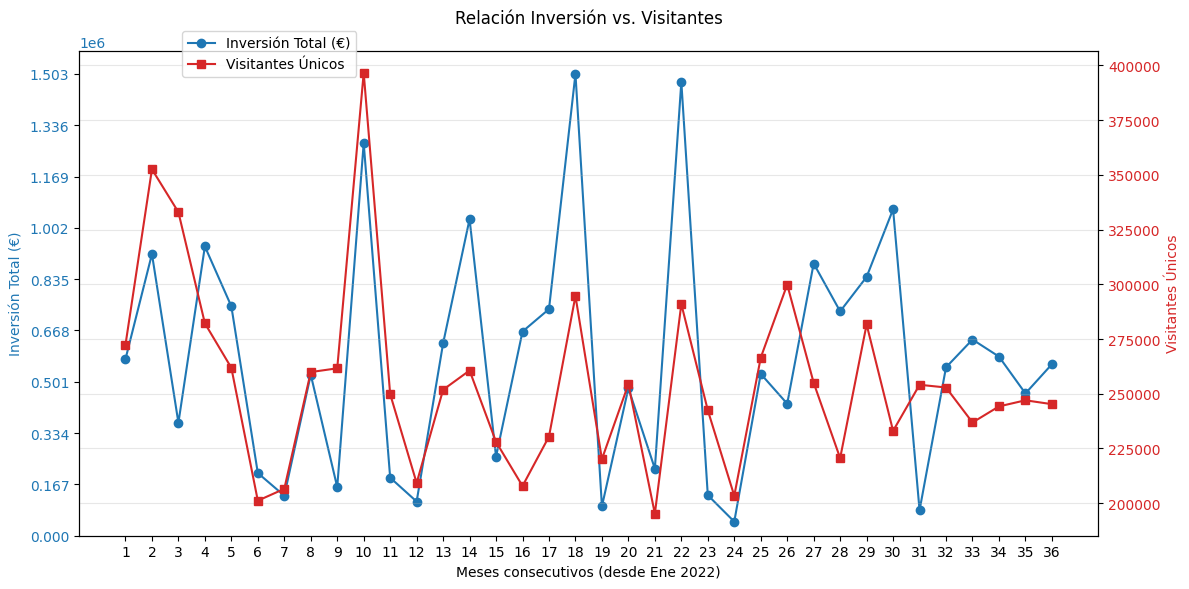

In [4]:
# Preparaci√≥n de datos
filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros
meses = range(1, len(filtered_df) + 1)  # √çndice num√©rico 1, 2, 3...

# Configuraci√≥n del gr√°fico
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Eje Izquierdo (Inversi√≥n Total) ---
ax1.plot(meses, filtered_df['INV_Total'], 
         color='tab:blue', marker='o', label='Inversi√≥n Total (‚Ç¨)')

# Configuraci√≥n del eje Y izquierdo
max_inversion = filtered_df['INV_Total'].max()
ax1.set_ylim(0, max_inversion * 1.05)  # 5% m√°s arriba del m√°ximo
ax1.set_yticks(np.linspace(0, max_inversion, 10))  # 10 divisiones equidistantes
ax1.set_ylabel('Inversi√≥n Total (‚Ç¨)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Eje Derecho (Visitantes √önicos) ---
ax2 = ax1.twinx()
ax2.plot(meses, filtered_df['Unique_visitors'], 
         color='tab:red', marker='s', label='Visitantes √önicos')
ax2.set_ylabel('Visitantes √önicos', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# --- Ajustes finales ---
ax1.set_xticks(meses)
ax1.set_xticklabels([f'{i}' for i in meses])
ax1.set_xlabel('Meses consecutivos (desde Ene 2022)')

plt.title('Relaci√≥n Inversi√≥n vs. Visitantes', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

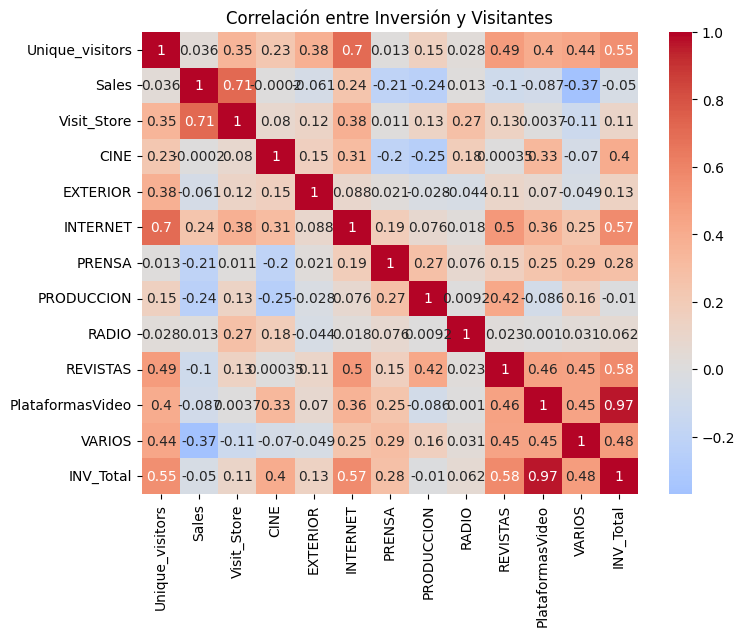

In [5]:
# Calcular matriz de correlaci√≥n
corr = filtered_df[['Unique_visitors',"Sales", 'Visit_Store', "CINE","EXTERIOR","INTERNET","PRENSA","PRODUCCION","RADIO","REVISTAS","PlataformasVideo","VARIOS","INV_Total"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlaci√≥n entre Inversi√≥n y Visitantes')
plt.show()

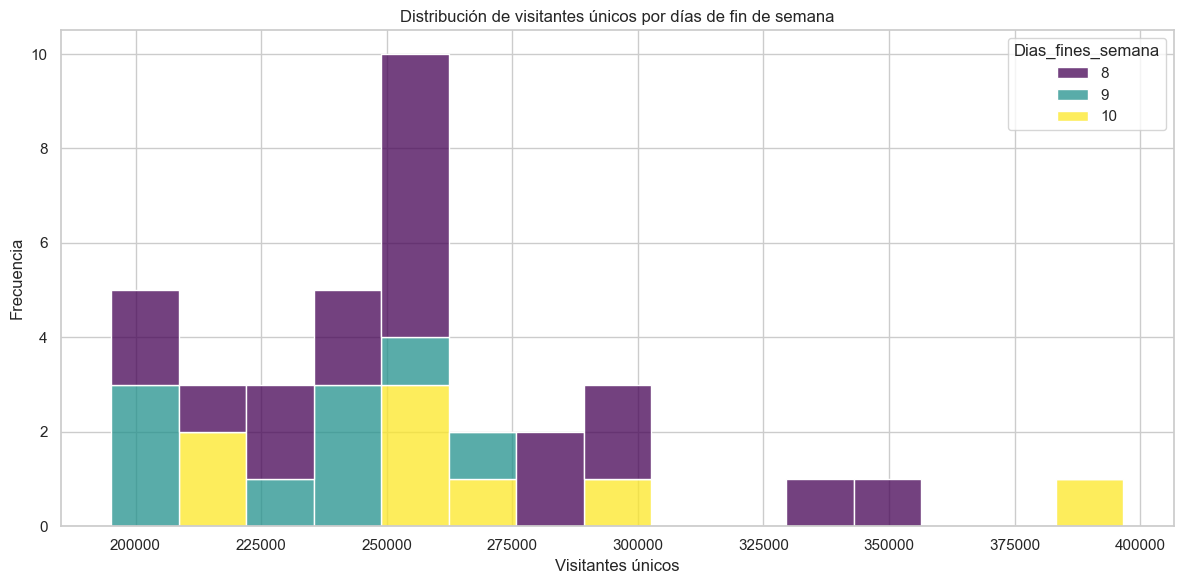

In [6]:
# Estilo
sns.set(style="whitegrid")

# Histograma agrupado por cantidad de d√≠as de fin de semana
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Unique_visitors', hue='Dias_fines_semana', bins=15, palette='viridis', multiple='stack')
plt.title('Distribuci√≥n de visitantes √∫nicos por d√≠as de fin de semana')
plt.xlabel('Visitantes √∫nicos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


C:\Users\josit\AppData\Local\Temp\ipykernel_28632\3927406491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')


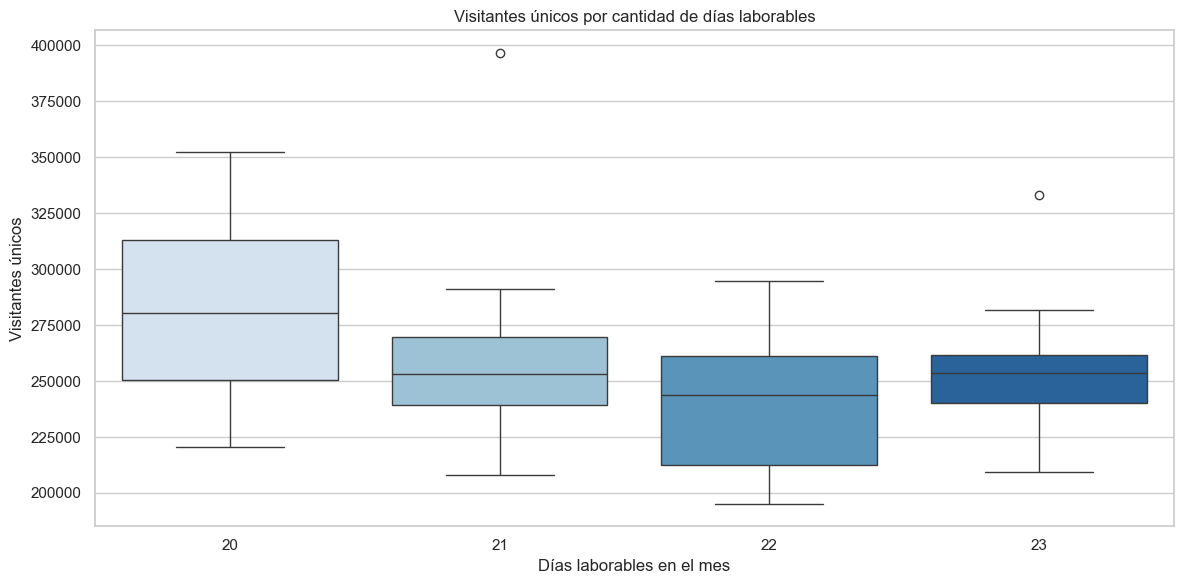

In [7]:
# Estilo
sns.set(style="whitegrid")

# Gr√°fico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')
plt.title('Visitantes √∫nicos por cantidad de d√≠as laborables')
plt.xlabel('D√≠as laborables en el mes')
plt.ylabel('Visitantes √∫nicos')
plt.tight_layout()
plt.show()


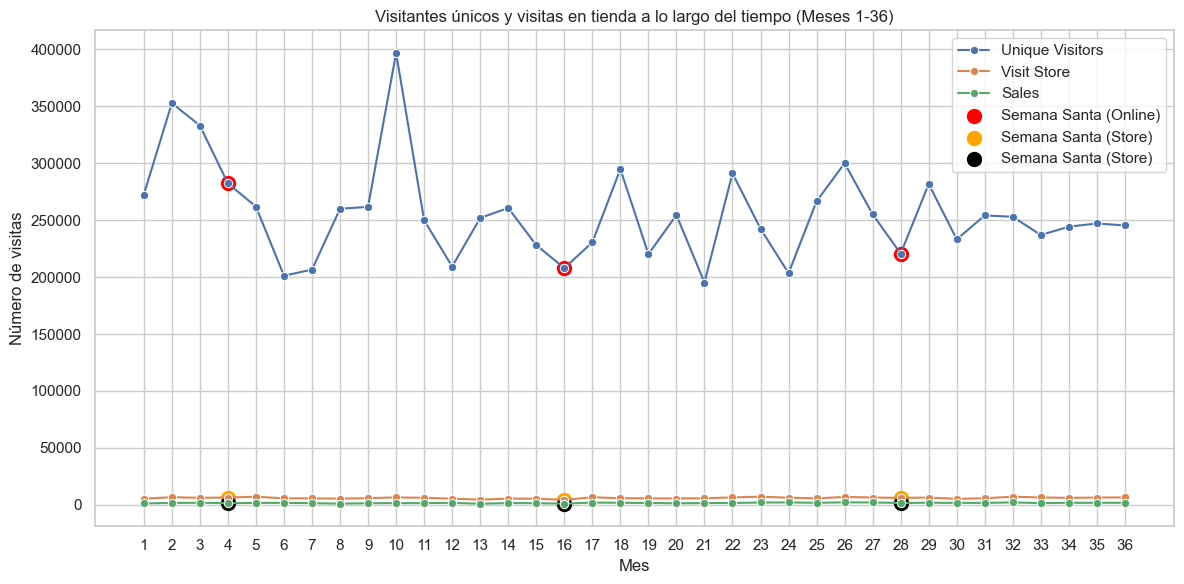

In [8]:
df['Mes_Num'] = range(1, len(df) + 1)

plt.figure(figsize=(12, 6))

# Desactivar errorbar
sns.lineplot(data=df, x='Mes_Num', y='Unique_visitors', marker='o', label='Unique Visitors', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Visit_Store', marker='o', label='Visit Store', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Sales', marker='o', label='Sales', errorbar=None)

# Colorear los puntos si es Semana Santa
easter_df = df[df['Easterweek'] == 1]
plt.scatter(easter_df['Mes_Num'], easter_df['Unique_visitors'], color='red', s=100, label='Semana Santa (Online)')
plt.scatter(easter_df['Mes_Num'], easter_df['Visit_Store'], color='orange', s=100, label='Semana Santa (Store)')
plt.scatter(easter_df['Mes_Num'], easter_df['Sales'], color='black', s=100, label='Semana Santa (Store)')

# Est√©tica
plt.title('Visitantes √∫nicos y visitas en tienda a lo largo del tiempo (Meses 1-36)')
plt.xlabel('Mes')
plt.ylabel('N√∫mero de visitas')
plt.legend()
plt.xticks(ticks=range(1, 37))
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# Cargar tus datos (ya debes tener el df cargado)
# Supongamos que se llama df

# Variables predictoras (X)
X_cols = filtered_df.drop(columns=['Sales', 'Unique_visitors', 'Visit_Store']).columns.tolist()

X = df[X_cols]

In [10]:
print(X.dtypes)

SocialNetworks         int64
DirectTraffic          int64
EMail                  int64
NaturalSearch          int64
OnlineMedia            int64
OtherReferrer          int64
PaidSearch             int64
CINE                 float64
EXTERIOR             float64
INTERNET             float64
PRENSA               float64
PRODUCCION           float64
RADIO                float64
REVISTAS             float64
PlataformasVideo     float64
VARIOS               float64
INV_Total            float64
Dias_mes               int64
Dia_inicio_mes         int64
Dia_findemes           int64
working_days           int64
Dias_fines_semana      int64
Easterweek             int64
dtype: object


In [11]:

# Variables objetivo (Y)
y_col_online = ['Unique_visitors']
y_col_sales = ['Sales']
y_sales = df[y_col_sales]
y_online = df[y_col_online]


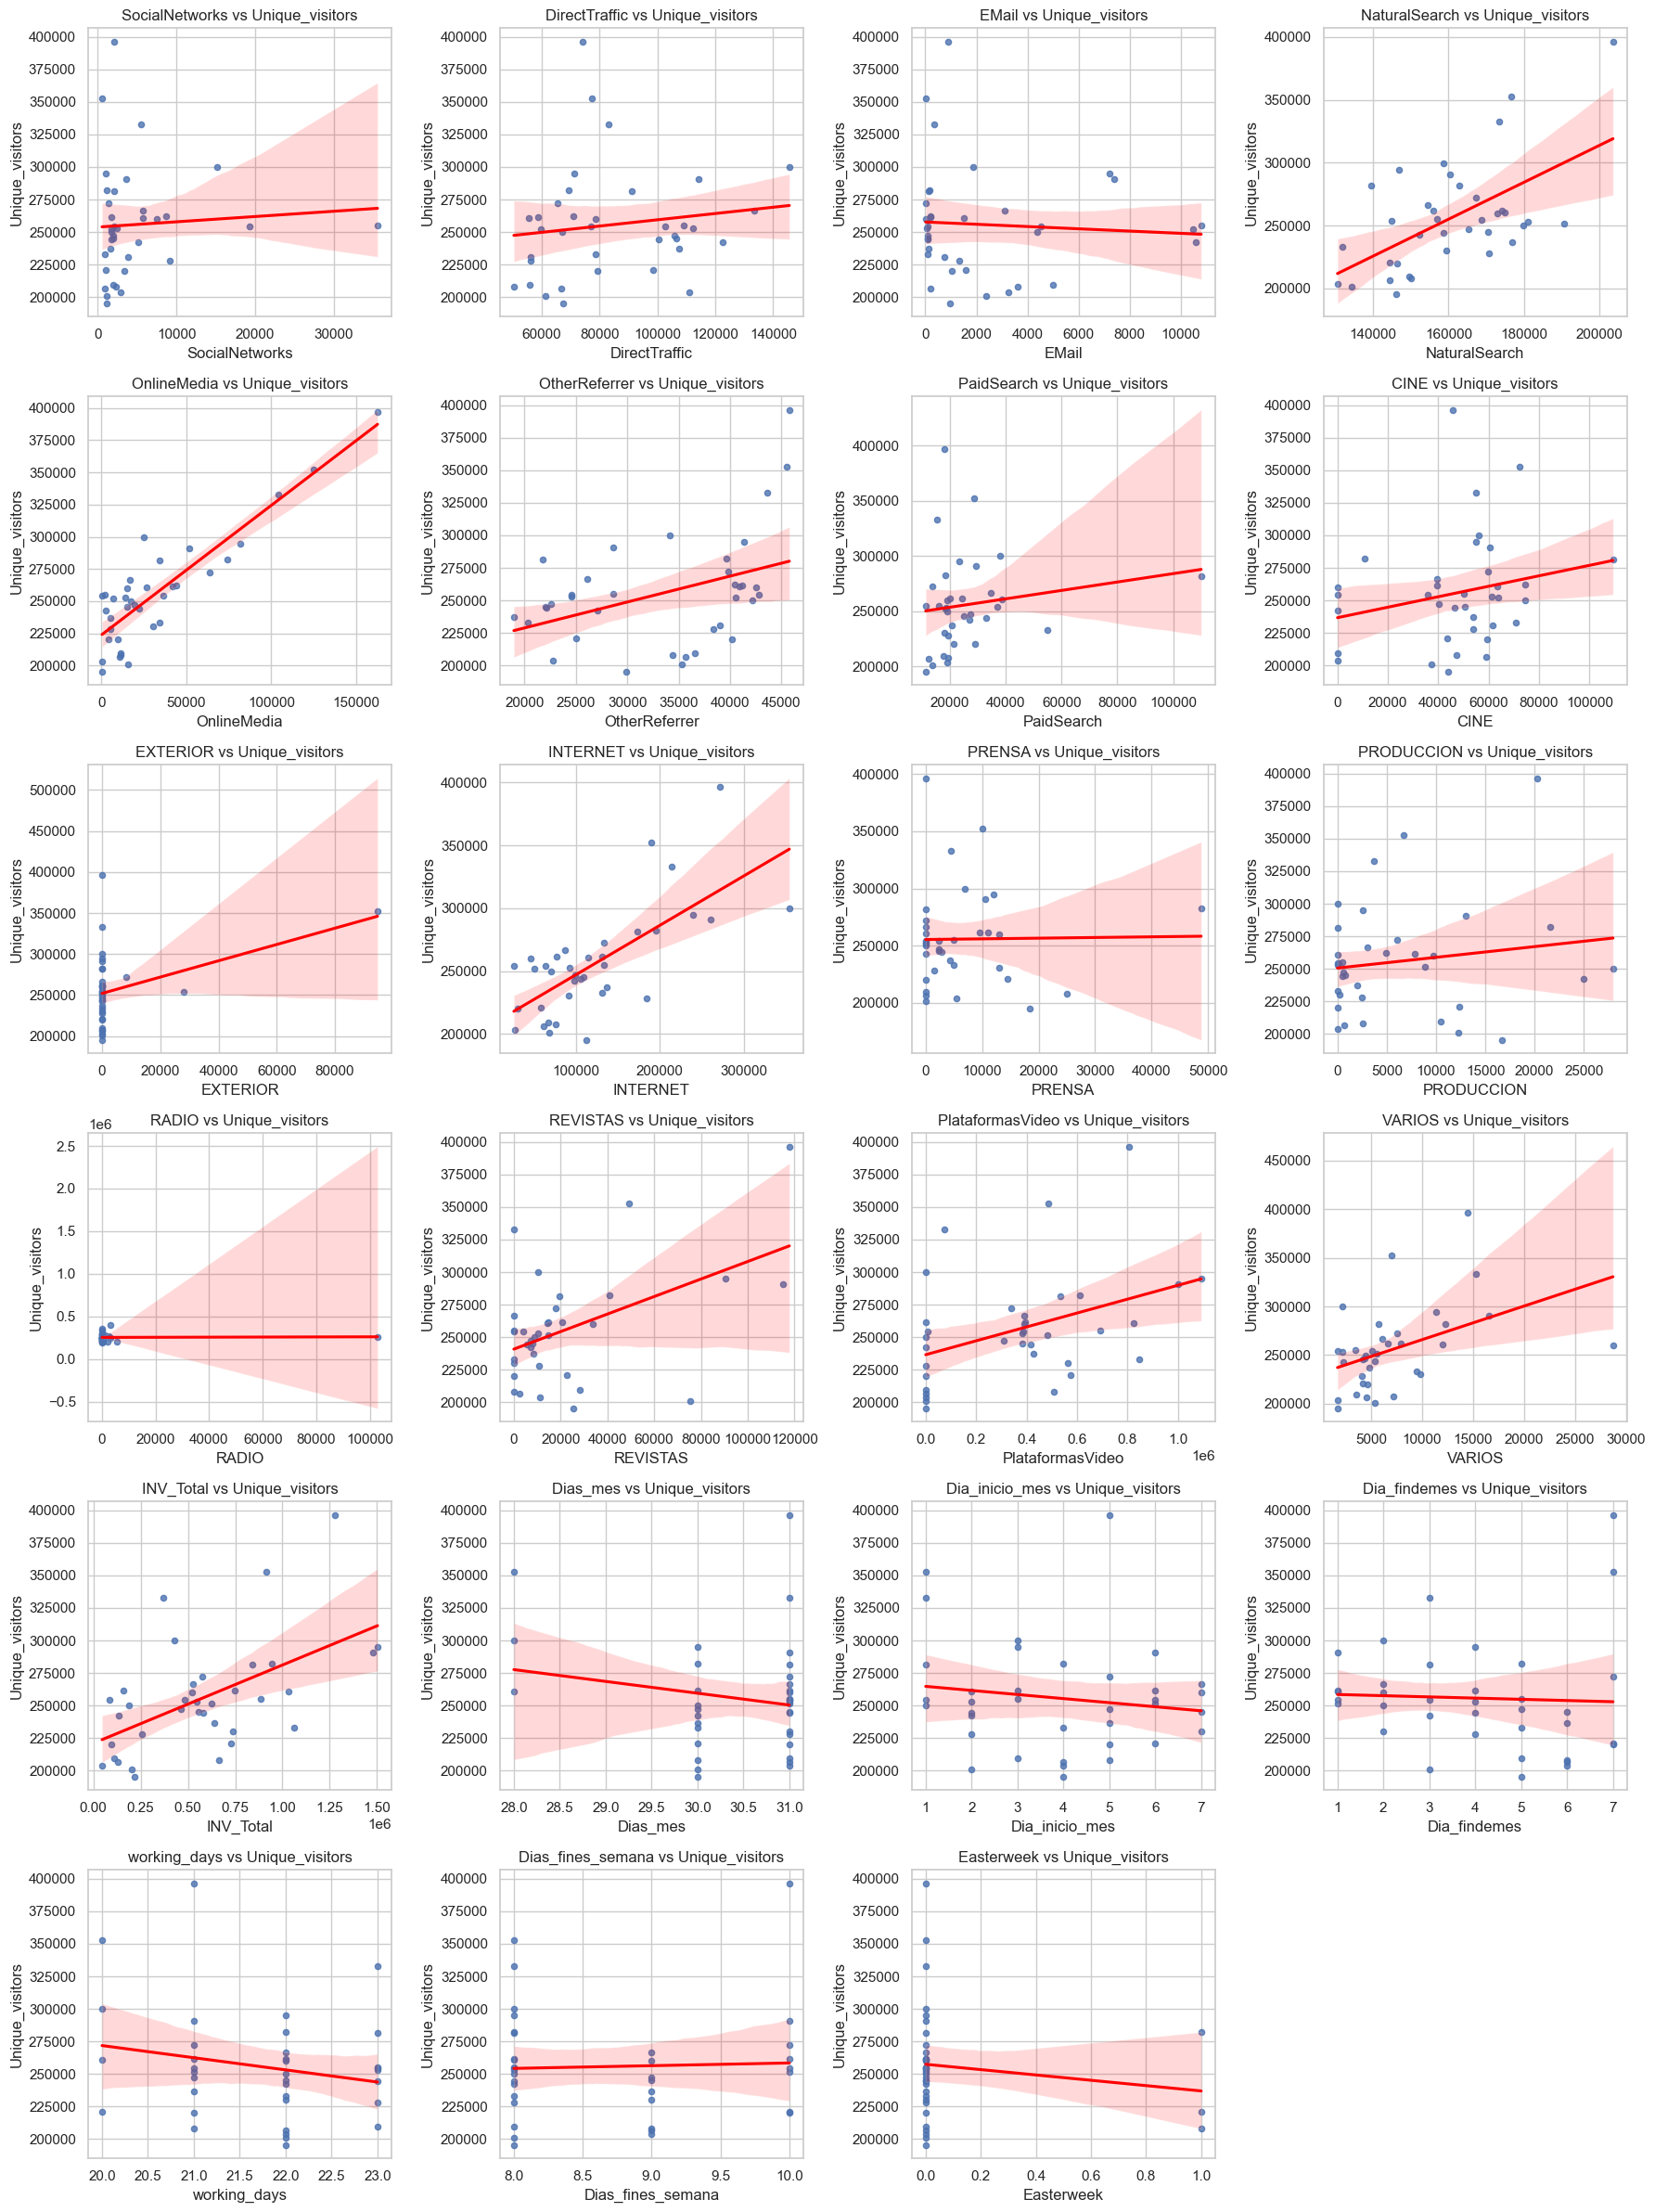

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = X.columns
n_cols = 4  # N√∫mero de columnas en la matriz
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcula cu√°ntas filas se necesitan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Graficar cada variable independiente contra la variable dependiente
for i, col in enumerate(cols):
    sns.regplot(data=df, x=col, y='Unique_visitors', ax=axes[i], scatter_kws={'s': 20}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs Unique_visitors')

# Eliminar subplots vac√≠os si hay menos gr√°ficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


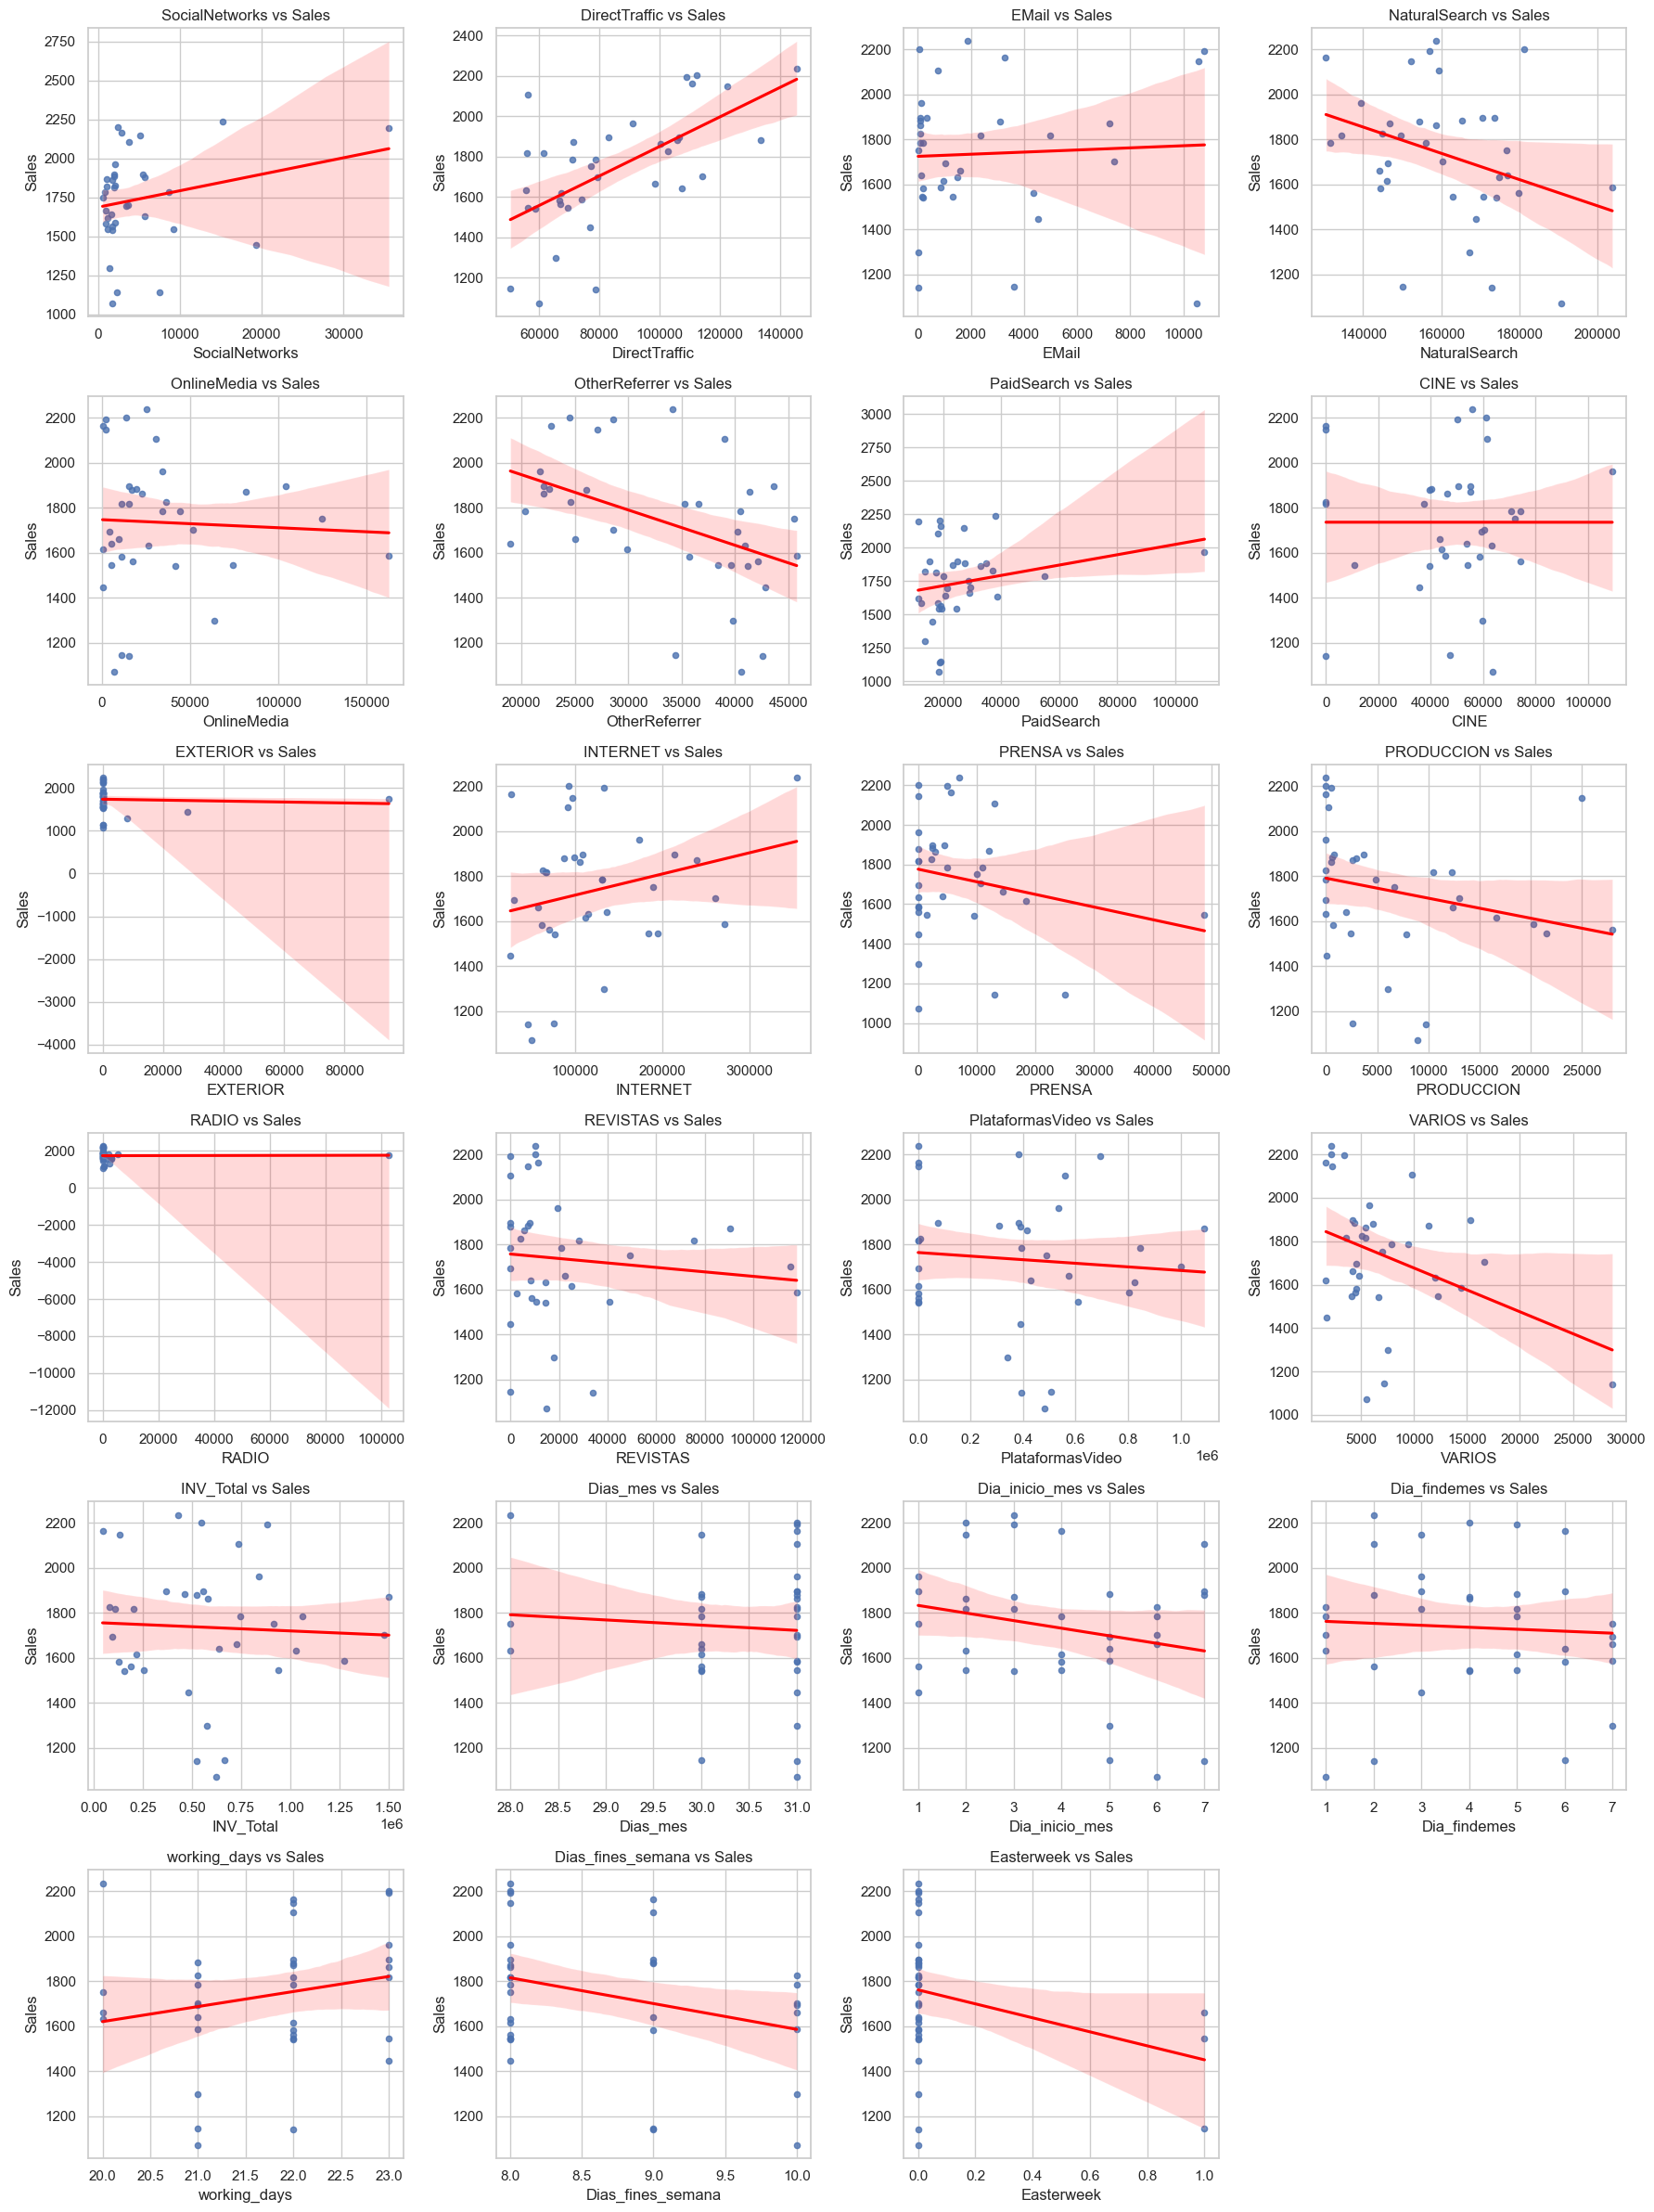

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = X.columns
n_cols = 4  # N√∫mero de columnas en la matriz
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcula cu√°ntas filas se necesitan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.regplot(data=df, x=col, y='Sales', ax=axes[i], scatter_kws={'s': 20}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs Sales')

# Eliminar subplots vac√≠os si hay menos gr√°ficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Conjunto fijo de columnas predictoras
fixed_predictors = ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 
                    'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'PRODUCCION', 'Dias_mes', 'Dia_findemes']

# Columnas variables que se combinar√°n
variable_predictors = ["CINE","EXTERIOR","INTERNET","RADIO","PlataformasVideo","VARIOS","INV_Total",
                       "Dia_inicio_mes","working_days","Easterweek"]

# Variable a predecir
target = 'Unique_visitors'  # O 'Sales'

# Almacenamiento del mejor resultado
best_score = -999
best_combo = None
best_model = None

# Combinaciones de 0 a N columnas variables
for r in range(len(variable_predictors) + 1):  # Incluye combinaciones vac√≠as
    for combo in itertools.combinations(variable_predictors, r):
        # Crear lista completa de variables para esta iteraci√≥n
        full_features = fixed_predictors + list(combo)
        
        X = df[full_features].copy()
        y = df[target]

        # Comprobar que no haya NaNs
        if X.isnull().values.any() or y.isnull().values.any():
            continue

        # Escalar
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train/Test split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Modelo
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluaci√≥n
        score = r2_score(y_test, y_pred)

        # Guardar si es mejor
        if score > best_score:
            best_score = score
            best_combo = full_features
            best_model = model

# Resultados
print("üîç Mejor combinaci√≥n de variables:", best_combo)
print("üìà Mejor R2 score:", round(best_score, 4))


üîç Mejor combinaci√≥n de variables: ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'PRODUCCION', 'Dias_mes', 'Dia_findemes']
üìà Mejor R2 score: 0.9157


In [15]:
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Conjunto fijo de columnas predictoras
fixed_predictors = ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'EXTERIOR', 'RADIO', 
                    'Easterweek']

# Columnas variables que se combinar√°n
variable_predictors = ["CINE","INTERNET","PRENSA","PRODUCCION","REVISTAS","PlataformasVideo","VARIOS","INV_Total",
                       "Dias_mes","Dia_inicio_mes","Dia_findemes","working_days",]

# Variable a predecir
target = 'Sales'  # O 'Sales'

# Almacenamiento del mejor resultado
best_score = -999
best_combo = None
best_model = None

# Combinaciones de 0 a N columnas variables
for r in range(len(variable_predictors) + 1):  # Incluye combinaciones vac√≠as
    for combo in itertools.combinations(variable_predictors, r):
        # Crear lista completa de variables para esta iteraci√≥n
        full_features = fixed_predictors + list(combo)
        
        X = df[full_features].copy()
        y = df[target]

        # Comprobar que no haya NaNs
        if X.isnull().values.any() or y.isnull().values.any():
            continue

        # Escalar
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train/Test split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Modelo
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluaci√≥n
        score = r2_score(y_test, y_pred)

        # Guardar si es mejor
        if score > best_score:
            best_score = score
            best_combo = full_features
            best_model = model

# Resultados
print("üîç Mejor combinaci√≥n de variables:", best_combo)
print("üìà Mejor R2 score:", round(best_score, 4))


üîç Mejor combinaci√≥n de variables: ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'EXTERIOR', 'RADIO', 'Easterweek']
üìà Mejor R2 score: 0.5501


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecci√≥n de variables predictoras seg√∫n la matriz de correlaci√≥n
predictors_online = ['SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch', 'OtherReferrer', 'PaidSearch', 'REVISTAS', 'OnlineMedia', 'Dias_fines_semana', 'PRENSA', 'PRODUCCION', 'Dias_mes', 'Dia_findemes']
predictors_offline = ['Dias_fines_semana', 'SocialNetworks', 'OnlineMedia', 'OtherReferrer', 'PaidSearch', 'EXTERIOR', 'RADIO', 'Easterweek',]

# Variables objetivo
y_online = filtered_df['Unique_visitors']
y_offline = filtered_df['Sales']

# Preparar conjuntos X para cada modelo
X_online = filtered_df[predictors_online]
X_offline = filtered_df[predictors_offline]

# Dividir en entrenamiento y prueba
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online, y_online, test_size=0.2, random_state=42)
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(X_offline, y_offline, test_size=0.2, random_state=42)

# Modelos de regresi√≥n lineal
model_online = LinearRegression().fit(X_train_online, y_train_online)
model_offline = LinearRegression().fit(X_train_offline, y_train_offline)

# Predicciones
y_pred_online = model_online.predict(X_test_online)
y_pred_offline = model_offline.predict(X_test_offline)

# M√©tricas
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)

mse_offline = mean_squared_error(y_test_offline, y_pred_offline)
r2_offline = r2_score(y_test_offline, y_pred_offline)

print(f"üìä Online - MSE: {mse_online:.2f}, R¬≤: {r2_online:.2f}")
print(f"üè¨ Offline - MSE: {mse_offline:.2f}, R¬≤: {r2_offline:.2f}")

# Coeficientes
coef_online_df = pd.DataFrame({'Canal': predictors_online, 'Impacto en Visitas Online': model_online.coef_})
coef_offline_df = pd.DataFrame({'Canal': predictors_offline, 'Impacto en Visitas Offline': model_offline.coef_})



üìä Online - MSE: 21504643.60, R¬≤: 0.92
üè¨ Offline - MSE: 55230.13, R¬≤: 0.55


In [17]:
print("Impacto en Visitas Offline:")
coef_offline_df

Impacto en Visitas Offline:


Canal  Impacto en Visitas Offline
0  Dias_fines_semana                 -101.094301
1     SocialNetworks                    0.011374
2        OnlineMedia                    0.002640
3      OtherReferrer                   -0.021925
4         PaidSearch                   -0.000465
5           EXTERIOR                   -0.000748
6              RADIO                    0.002444
7         Easterweek                 -229.486951

# An√°lisis de Impacto de los Canales de Marketing en Ventas Offline

En este an√°lisis, se eval√∫a el impacto de diversos canales de marketing sobre las **ventas offline** (ventas f√≠sicas o en tienda). Utilizando un modelo de regresi√≥n lineal, hemos identificado los coeficientes que muestran c√≥mo cada canal influye en las ventas. Estos coeficientes nos ayudan a interpretar qu√© factores contribuyen m√°s a las ventas f√≠sicas.

### Resultados para las Ventas Offline (sin estandarizaci√≥n)

A continuaci√≥n se presentan los **coeficientes no estandarizados** para **ventas offline**:

#### **Coeficientes para Ventas Offline (sin estandarizar)**:

| Canal             | Impacto en Ventas Offline |
|-------------------|---------------------------|
| Dias_fines_semana | -101.094301               |
| SocialNetworks    | 0.011373741               |
| OnlineMedia       | 0.002640313               |
| OtherReferrer     | -0.021924856              |
| PaidSearch        | -0.000464889             |
| EXTERIOR          | -0.000748304             |
| RADIO             | 0.002444096              |
| Easterweek        | -229.486951              |

### **Interpretaci√≥n de los Coeficientes**

1. **Dias_fines_semana (-101.094301)**:
   - Este coeficiente negativo indica que un aumento en los **d√≠as de fin de semana** **disminuye las ventas offline** en aproximadamente **101.09 unidades**. Esto puede sugerir que las ventas f√≠sicas son m√°s bajas en los fines de semana, tal vez debido a la competencia con actividades personales o eventos durante esos d√≠as.
   
2. **SocialNetworks (0.011373741)**:
   - Este coeficiente positivo indica que un aumento en el tr√°fico proveniente de **Redes Sociales** est√° asociado con un peque√±o aumento en las **ventas offline**. Aunque el coeficiente es bajo, puede indicar que las campa√±as de redes sociales tienen un leve impacto positivo en las ventas f√≠sicas.
   
3. **OnlineMedia (0.002640313)**:
   - El impacto de **Online Media** en las ventas offline es peque√±o pero positivo, lo que indica que un incremento en el tr√°fico proveniente de **medios online** (como anuncios, redes sociales, o sitios web) contribuye de manera positiva a las ventas f√≠sicas, aunque de forma modesta.

4. **OtherReferrer (-0.021924856)**:
   - Este coeficiente negativo indica que un aumento en el tr√°fico de **Other Referrers** (fuentes de referencia externas no especificadas) est√° asociado con una peque√±a **reducci√≥n de las ventas offline**. Esto podr√≠a sugerir que las fuentes de referencia no relacionadas con marketing directo o estrategias promocionales no tienen un impacto positivo en las ventas f√≠sicas.

5. **PaidSearch (-0.000464889)**:
   - El coeficiente negativo es muy peque√±o, lo que indica que **Paid Search** tiene un impacto m√≠nimo, casi nulo, en las ventas offline. Esto puede sugerir que las campa√±as pagadas de b√∫squeda no est√°n contribuyendo significativamente a las ventas f√≠sicas.

6. **EXTERIOR (-0.000748304)**:
   - Similar a PaidSearch, el impacto de **EXTERIOR** es casi nulo en las ventas f√≠sicas. Esto podr√≠a indicar que el marketing fuera de l√≠nea o en otras regiones geogr√°ficas no tiene un impacto notable.

7. **RADIO (0.002444096)**:
   - El impacto de la **publicidad en radio** tambi√©n es peque√±o pero positivo. Aunque es modesto, este coeficiente sugiere que la publicidad en radio puede tener un ligero efecto positivo en las ventas offline.

8. **Easterweek (-229.486951)**:
   - Este coeficiente negativo grande sugiere que las **ventas offline** durante la **Semana Santa** son **mucho menores** en comparaci√≥n con otras semanas. Es posible que los consumidores prefieran realizar compras online o que haya una menor afluencia a las tiendas durante este periodo.


### **Conclusi√≥n**

En el an√°lisis realizado, se observa que **los fines de semana** tienen un **gran impacto negativo en las ventas offline**. El coeficiente negativo de **Dias_fines_semana** (-101.094301) sugiere que, a medida que se incrementan los d√≠as de fin de semana, las ventas en tienda disminuyen. Esto indica que los consumidores tienden a realizar menos compras en f√≠sico durante el fin de semana, posiblemente debido a la preferencia por otras actividades o al aumento de las compras en l√≠nea durante estos d√≠as. **Reducir la dependencia de las ventas f√≠sicas durante los fines de semana** y encontrar formas de **atraer a m√°s clientes en esos d√≠as** puede ser clave para optimizar las ventas.

Adem√°s, **la Semana Santa** muestra una disminuci√≥n considerable en las ventas f√≠sicas, con un coeficiente negativo de **-229.486951**. Este descenso en las ventas durante este periodo sugiere que las **vacaciones o las festividades** afectan negativamente las compras en tienda. Durante estas √©pocas de menor afluencia, **ser√≠a recomendable ser m√°s conservadores en las inversiones en ventas f√≠sicas**, ya que la gente tiende a no comprar tanto en tienda f√≠sica. **Invertir menos en estos per√≠odos de baja afluencia** y **redirigir esos recursos hacia otros canales**, como el online, puede ser una estrategia m√°s efectiva.

Por otro lado, los resultados sugieren que **las inversiones en PaidSearch, EXTERIOR y otras referencias externas** tienen un impacto **m√≠nimo o casi nulo** en las **ventas f√≠sicas**. Esto sugiere que **no es tan rentable invertir en estos canales para aumentar las ventas en tienda**, y ser√≠a m√°s efectivo redirigir esos recursos hacia canales con mayor impacto directo.

En cuanto a los canales m√°s efectivos, **OnlineMedia**, **SocialNetworks** y **RADIO** tienen un impacto positivo en las ventas offline. El coeficiente de **OnlineMedia (0.002640313)** muestra que, aunque modesto, **un aumento en el tr√°fico proveniente de medios online** contribuye a un aumento en las ventas f√≠sicas, lo que indica que los consumidores que se involucran con los medios online tienden a visitar m√°s las tiendas f√≠sicas. De igual manera, **las redes sociales** tienen un **efecto positivo**, con un coeficiente de **0.011373741**, lo que refuerza la idea de que las campa√±as en redes sociales ayudan a aumentar el tr√°fico hacia las tiendas. La **publicidad en radio** tambi√©n muestra un peque√±o efecto positivo, lo que sugiere que **potenciar estos canales** podr√≠a ser una estrategia efectiva.

En resumen, para **optimizar las ventas f√≠sicas**, es esencial:
- **Reducir el impacto negativo de los fines de semana y la Semana Santa**, buscando maneras de atraer m√°s clientes durante estos periodos.
- **Ser conservadores en las inversiones f√≠sicas durante Semana Santa**, ya que las ventas tienden a disminuir.
- **Invertir menos en PaidSearch, EXTERIOR y otros canales con bajo impacto** en las ventas f√≠sicas.
- **Reforzar las inversiones en OnlineMedia, SocialNetworks y Radio**, que han demostrado tener un impacto positivo en las ventas offline.

Una estrategia m√°s centrada en **potenciar los canales digitales** y **ajustar las inversiones durante los per√≠odos de baja afluencia**, como los fines de semana o la Semana Santa, puede ser clave para mejorar las ventas f√≠sicas.


In [18]:
print("Impacto en Visitas Online:")
coef_online_df

Impacto en Visitas Online:


Canal  Impacto en Visitas Online
0      SocialNetworks                   0.827732
1       DirectTraffic                   0.564661
2               EMail                   0.740127
3       NaturalSearch                   0.764799
4       OtherReferrer                   1.079573
5          PaidSearch                   0.590667
6            REVISTAS                   0.032657
7         OnlineMedia                   0.846459
8   Dias_fines_semana                -444.153312
9              PRENSA                   0.082160
10         PRODUCCION                  -0.220939
11           Dias_mes                 507.927285
12       Dia_findemes                -485.620478

# **An√°lisis de Impacto de los Canales de Marketing en Visitas Online**

En este an√°lisis, se eval√∫a el impacto de diversos canales de marketing sobre las **visitas online** (accesos a la p√°gina web). Utilizando un modelo de regresi√≥n lineal, hemos identificado los coeficientes que muestran c√≥mo cada canal influye en las visitas online. Estos coeficientes nos ayudan a interpretar qu√© factores contribuyen m√°s a las visitas a la p√°gina web.

### Resultados para las Visitas Online (sin estandarizaci√≥n)

A continuaci√≥n se presentan los **coeficientes no estandarizados** para **visitas online**:

#### **Coeficientes para Visitas Online (sin estandarizar)**:

| Canal             | Impacto en Visitas Online |
|-------------------|---------------------------|
| SocialNetworks    | 0.827732                  |
| DirectTraffic     | 0.564661                  |
| EMail             | 0.740127                  |
| NaturalSearch     | 0.764799                  |
| OtherReferrer     | 1.079573                  |
| PaidSearch        | 0.590667                  |
| REVISTAS          | 0.032657                  |
| OnlineMedia       | 0.846459                  |
| Dias_fines_semana | -444.153312               |
| PRENSA            | 0.082160                  |
| PRODUCCION        | -0.220939                 |
| Dias_mes          | 507.927285                |
| Dia_findemes      | -485.620478               |

### **Interpretaci√≥n de los Coeficientes**

1. **SocialNetworks (0.827732)**:
   - Este coeficiente positivo indica que un aumento en el tr√°fico proveniente de **Redes Sociales** est√° asociado con un **aumento significativo en las visitas online**. Las campa√±as de redes sociales tienen un impacto positivo en atraer a m√°s usuarios a la p√°gina web.

2. **DirectTraffic (0.564661)**:
   - El coeficiente positivo sugiere que el tr√°fico directo (cuando los usuarios acceden directamente al sitio web) tiene un **efecto positivo** sobre las visitas online. Un aumento en el tr√°fico directo puede reflejar un mayor reconocimiento de marca o fidelizaci√≥n de usuarios recurrentes.

3. **EMail (0.740127)**:
   - El coeficiente positivo muestra que las campa√±as de **email marketing** tambi√©n tienen un impacto significativo en el aumento de visitas online, lo que refuerza la importancia de utilizar el correo electr√≥nico como herramienta de atracci√≥n de tr√°fico.

4. **NaturalSearch (0.764799)**:
   - Un coeficiente positivo en **NaturalSearch** indica que el tr√°fico org√°nico proveniente de motores de b√∫squeda tiene un **gran impacto positivo** en las visitas online. Mejorar el posicionamiento en motores de b√∫squeda puede generar m√°s accesos al sitio web.

5. **OtherReferrer (1.079573)**:
   - Este coeficiente alto y positivo sugiere que las visitas provenientes de **otras fuentes de referencia** (no especificadas) tienen un impacto muy fuerte en el tr√°fico web, lo que significa que ciertas asociaciones o menciones externas pueden generar una gran cantidad de visitas.

6. **PaidSearch (0.590667)**:
   - El impacto positivo de **PaidSearch** en las visitas online indica que las campa√±as de publicidad pagada en motores de b√∫squeda tambi√©n son efectivas para atraer usuarios al sitio web, aunque su impacto es m√°s moderado que el de otras fuentes como redes sociales o b√∫squeda org√°nica.

7. **REVISTAS (0.032657)**:
   - El impacto de **REVISTAS** es muy peque√±o pero positivo, lo que sugiere que las menciones en revistas o medios tradicionales tienen un efecto leve, aunque no tan significativo, en el tr√°fico online.

8. **OnlineMedia (0.846459)**:
   - Este coeficiente es uno de los m√°s altos, lo que indica que un aumento en el tr√°fico proveniente de **medios online** (como anuncios digitales, blogs, u otros medios en l√≠nea) contribuye significativamente a las visitas a la p√°gina web.

9. **Dias_fines_semana (-444.153312)**:
   - Este coeficiente negativo sugiere que un aumento en los **d√≠as de fin de semana** est√° asociado con una **disminuci√≥n importante de las visitas online**. Los fines de semana parecen tener un impacto negativo en las visitas al sitio web, lo cual podr√≠a ser debido a que los consumidores prefieren realizar actividades offline durante esos d√≠as o a un cambio en el comportamiento de b√∫squeda.

10. **PRENSA (0.082160)**:
   - El impacto de la **prensa** es muy peque√±o pero positivo, indicando que las menciones en medios de comunicaci√≥n tienen un efecto modesto sobre las visitas online.

11. **PRODUCCION (-0.220939)**:
   - Este coeficiente negativo muestra que un aumento en la variable **PRODUCCION** est√° asociado con una **reducci√≥n en las visitas online**, lo que sugiere que este canal no es tan efectivo para atraer tr√°fico web.

12. **Dias_mes (507.927285)**:
   - Un coeficiente extremadamente alto indica que los **d√≠as del mes** tienen un gran impacto positivo en las visitas online. Esto podr√≠a reflejar que, en ciertos per√≠odos del mes, hay m√°s actividad en l√≠nea, posiblemente relacionada con promociones o fechas clave.

13. **Dia_findemes (-485.620478)**:
   - Este coeficiente negativo muestra que los **√∫ltimos d√≠as del mes** tienen una disminuci√≥n significativa en las visitas online, lo que podr√≠a deberse a que los consumidores ya han realizado sus compras o b√∫squedas al inicio del mes.

### **Conclusi√≥n**

En el an√°lisis realizado, se observa que ciertos canales tienen un impacto positivo considerable en las **visitas online**, mientras que otros, como los **fines de semana** y ciertos periodos del mes, tienen un efecto negativo.

- **Las Redes Sociales**, **Online Media** y **el Tr√°fico Directo** son algunos de los canales m√°s efectivos para aumentar las visitas a la p√°gina web. Es recomendable invertir m√°s en estos canales, ya que muestran un impacto positivo significativo en el tr√°fico online.

- **Los fines de semana** parecen ser un periodo donde las visitas online disminuyen considerablemente, lo que sugiere que **las estrategias de marketing durante este tiempo deben ser m√°s espec√≠ficas** o, en algunos casos, incluso reducirse.

- **La Semana Santa** o √©pocas similares, reflejadas en **Dias_fines_semana**, indican una ca√≠da en el tr√°fico online, lo que sugiere que durante estos periodos puede ser mejor **no invertir tanto** en marketing digital y ajustar las campa√±as a las preferencias de los usuarios.

- **Otras fuentes de referencia** como **OtherReferrer** y **Email Marketing** tambi√©n juegan un papel importante en atraer visitas online, por lo que es √∫til seguir potenciando estas estrategias.

En resumen, para **optimizar las visitas online**, es esencial:
- **Invertir m√°s en canales con gran impacto positivo** como **Social Networks, Online Media, y Direct Traffic**.
- **Reducir o ajustar las inversiones durante los fines de semana**, cuando el tr√°fico online tiende a disminuir.
- **Ajustar las estrategias para maximizar el impacto de las fuentes de referencia** y los **canales de marketing directo**.

Una estrategia m√°s centrada en **optimizar las campa√±as durante d√≠as clave** y **ajustar las inversiones en per√≠odos de menor tr√°fico**, como los fines de semana o finales de mes, puede ser clave para aumentar las visitas online.


# An√°lisis de Rentabilidad de la Inversi√≥n en Canales de Marketing para Ventas F√≠sicas y Visitas Online

### **An√°lisis Comparativo y Recomendaciones**

1. **Redes Sociales y Online Media**:
   - **Impacto en Ventas F√≠sicas**: Moderado (0.011373741 para SocialNetworks, 0.002640313 para OnlineMedia).
   - **Impacto en Visitas Online**: Alto (0.827732 para SocialNetworks, 0.846459 para OnlineMedia).
   - **Conclusi√≥n**: Invertir en **Redes Sociales** (SocialNetworks) y **Online Media** es rentable tanto para **aumentar visitas online** como para **ventas f√≠sicas**. El impacto es positivo y significativo.

2. **Email Marketing**:
   - **Impacto en Ventas F√≠sicas**: Nulo (-).
   - **Impacto en Visitas Online**: Alto (0.740127).
   - **Conclusi√≥n**: **Email Marketing** es excelente para **aumentar visitas online**, pero **no tiene impacto en ventas f√≠sicas**.

3. **Paid Search**:
   - **Impacto en Ventas F√≠sicas**: M√≠nimo (-0.000464889).
   - **Impacto en Visitas Online**: Moderado (0.590667).
   - **Conclusi√≥n**: **Paid Search** tiene un impacto **m√≠nimo en ventas f√≠sicas**, pero **puede ser √∫til para generar visitas online**.

4. **Semana Santa**:
   - **Impacto en Ventas F√≠sicas**: Muy negativo (-229.486951).
   - **Impacto en Visitas Online**: Nulo (-).

   - **Conclusi√≥n**: Durante **Semana Santa**, **ser m√°s conservadores** en las inversiones en **ventas f√≠sicas**. Potenciar **canales online** como **Redes Sociales** y **Email Marketing** es m√°s rentable.

5. **Fines de Semana**:
   - **Impacto en Ventas F√≠sicas**: Negativo (-101.094301).
   - **Impacto en Visitas Online**: Muy negativo (-444.153312).
   - **Conclusi√≥n**: **Reducir inversiones** tanto en **ventas f√≠sicas** como en **visitas online** durante **fines de semana**, ya que ambos coeficientes muestran un impacto negativo.

### **Resumen Final**
- **Invertir en Redes Sociales y Online Media**: Son efectivos tanto para **aumentar visitas online** como **ventas f√≠sicas**.
- **Ser conservadores en Semana Santa**: Invertir menos en ventas f√≠sicas y potenciar canales online debido a la baja afluencia en tienda f√≠sica durante este per√≠odo.
- **Reevaluar Paid Search**: Es √∫til para **tr√°fico online**, pero tiene un **impacto m√≠nimo en ventas f√≠sicas**.
- **Ajustar estrategias en fines de semana**: Reducir la inversi√≥n en estos d√≠as debido a la **baja actividad** tanto en ventas f√≠sicas (-101.094301) como en visitas online (-444.153312).


In [24]:
# Columnas de inversi√≥n a ajustar
columnas_inversion = [
    'CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 'PRODUCCION',
    'RADIO', 'REVISTAS', 'PlataformasVideo', 'VARIOS', 'INV_Total'
]
columnas_visitas = ['OnlineMedia', 'SocialNetworks', 'DirectTraffic', 'EMail', 'NaturalSearch',
    'OtherReferrer', 'PaidSearch',]
# Funci√≥n para obtener el factor de ajuste seg√∫n el mes
def obtener_factor(mes):
    if mes >= 36:
        return 1.15
    elif mes >= 30:
        return 1.21
    elif mes >= 24:
        return 1.25
    else:
        return 1
    
# Funci√≥n para obtener el factor de ajuste seg√∫n el mes
def obtener_factor2(mes):
    if mes >= 36:
        return 1.05
    elif mes >= 30:
        return 1.07
    else:
        return 1

# Crear la columna 'Mes'
filtered_df['Mes'] = list(range(1, 37))  # Aseg√∫rate de que filtered_df tenga 36 filas

# Aplicar el ajuste a cada columna de inversi√≥n
for col in columnas_inversion:
    filtered_df[f'{col}_Ajustado'] = filtered_df.apply(lambda row: row[col] * obtener_factor(row['Mes']), axis=1)

# Aplicar el ajuste a cada columna de inversi√≥n
for col in columnas_visitas:
    filtered_df[f'{col}_Ajustado'] = filtered_df.apply(lambda row: row[col] * obtener_factor2(row['Mes']), axis=1)

# Tambi√©n puedes visualizar algunos resultados si quieres
filtered_df.head()


C:\Users\josit\AppData\Local\Temp\ipykernel_28632\2980569822.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Mes'] = list(range(1, 37))  # Aseg√∫rate de que filtered_df tenga 36 filas
C:\Users\josit\AppData\Local\Temp\ipykernel_28632\2980569822.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[f'{col}_Ajustado'] = filtered_df.apply(lambda row: row[col] * obtener_factor(row['Mes']), axis=1)
C:\Users\josit\AppData\Local\Temp\ipykernel_28632\2980569822.py:37: SettingWithCopyWar

Unique_visitors  Visit_Store  Sales  SocialNetworks  \
ID_Date                                                           
2022-01-01           272382         5516   1299            1415   
2022-02-01           352581         6769   1752             546   
2022-03-01           332955         6249   1897            5444   
2022-04-01           282169         6507   1546            1184   
2022-05-01           261829         7183   1784            8648   

            DirectTraffic  EMail  NaturalSearch  OnlineMedia  OtherReferrer  \
ID_Date                                                                       
2022-01-01          65373     25         167199        63649          39808   
2022-02-01          77209     26         176733       124861          45543   
2022-03-01          83178    341         173514       104132          43583   
2022-04-01          69335    162         162805        74044          39650   
2022-05-01          70972    210         156011        44196          40472   

            PaidSearch      CINE  EXTERIOR   INTERNET   PRENSA  PRODUCCION  \
ID_Date                                                                      
2022-01-01       13798  59887.84   8200.00  133666.43      0.0      6050.0   
2022-02-01       28656  72291.56  94627.51  189275.94  10000.0      6700.0   
2022-03-01       15243  55000.00      0.00  214037.62   4500.0      3700.0   
2022-04-01       18510  10883.30      0.00  194816.97  48800.0     21550.0   
2022-05-01       20031  74333.20      0.00  130795.16  11000.0      4900.0   

                RADIO  REVISTAS  PlataformasVideo    VARIOS  INV_Total  \
ID_Date                                                                  
2022-01-01    2426.40  18013.50         338824.94   7531.03     574600   
2022-02-01       0.00  49110.91         487537.14   6972.02     916515   
2022-03-01       0.00      0.00          75000.00  15284.85     367522   
2022-04-01    1140.00  40876.00         610865.89  12255.75     941188   
2022-05-01  102851.86  20775.75         393807.74   7926.46     746390   

            Dias_mes  Dia_inicio_mes  Dia_findemes  working_days  \
ID_Date                                                            
2022-01-01        31               5             7            21   
2022-02-01        28               1             7            20   
2022-03-01        31               1             3            23   
2022-04-01        30               4             5            22   
2022-05-01        31               6             1            21   

            Dias_fines_semana  Easterweek  Mes  CINE_Ajustado  \
ID_Date                                                         
2022-01-01                 10           0    1       59887.84   
2022-02-01                  8           0    2       72291.56   
2022-03-01                  8           0    3       55000.00   
2022-04-01                  8           1    4       10883.30   
2022-05-01                 10           0    5       74333.20   

            EXTERIOR_Ajustado  INTERNET_Ajustado  PRENSA_Ajustado  \
ID_Date                                                             
2022-01-01            8200.00          133666.43              0.0   
2022-02-01           94627.51          189275.94          10000.0   
2022-03-01               0.00          214037.62           4500.0   
2022-04-01               0.00          194816.97          48800.0   
2022-05-01               0.00          130795.16          11000.0   

            PRODUCCION_Ajustado  RADIO_Ajustado  REVISTAS_Ajustado  \
ID_Date                                                              
2022-01-01               6050.0         2426.40           18013.50   
2022-02-01               6700.0            0.00           49110.91   
2022-03-01               3700.0            0.00               0.00   
2022-04-01              21550.0         1140.00           40876.00   
2022-05-01               4900.0       102851.86           20775.75   

            Pl

In [34]:

filtered_df_ajustado = filtered_df.copy()


filtered_df_ajustado.head(10)

Unique_visitors  Visit_Store  Sales  SocialNetworks  \
ID_Date                                                           
2022-01-01           272382         5516   1299            1415   
2022-02-01           352581         6769   1752             546   
2022-03-01           332955         6249   1897            5444   
2022-04-01           282169         6507   1546            1184   
2022-05-01           261829         7183   1784            8648   
2022-06-01           201141         5798   1818            1082   
2022-07-01           206538         5784   1583             909   
2022-08-01           259903         5505   1142            7511   
2022-09-01           261618         5967   1541            1773   
2022-10-01           396642         6611   1586            2117   

            DirectTraffic  EMail  NaturalSearch  OnlineMedia  OtherReferrer  \
ID_Date                                                                       
2022-01-01          65373     25         167199        63649          39808   
2022-02-01          77209     26         176733       124861          45543   
2022-03-01          83178    341         173514       104132          43583   
2022-04-01          69335    162         162805        74044          39650   
2022-05-01          70972    210         156011        44196          40472   
2022-06-01          61455   2374         134355        15600          35272   
2022-07-01          66835    204         144300        11000          35674   
2022-08-01          78704     14         172986        15205          42545   
2022-09-01          58630    199         174125        41832          41167   
2022-10-01          74040    874         203699       162588          45763   

            PaidSearch      CINE  EXTERIOR   INTERNET   PRENSA  PRODUCCION  \
ID_Date                                                                      
2022-01-01       13798  59887.84   8200.00  133666.43      0.0      6050.0   
2022-02-01       28656  72291.56  94627.51  189275.94  10000.0      6700.0   
2022-03-01       15243  55000.00      0.00  214037.62   4500.0      3700.0   
2022-04-01       18510  10883.30      0.00  194816.97  48800.0     21550.0   
2022-05-01       20031  74333.20      0.00  130795.16  11000.0      4900.0   
2022-06-01       13658  37400.00      0.00   67827.66      0.0     12250.0   
2022-07-01       12262  58816.50      0.00   61897.17      0.0       650.0   
2022-08-01       18902      0.00      0.00   46362.01  13000.0      9750.0   
2022-09-01       24528  39483.30      0.00   77470.41   9507.8      7850.0   
2022-10-01       18063  45733.20      0.00  271750.66      0.0     20300.0   

                RADIO   REVISTAS  PlataformasVideo    VARIOS  INV_Total  \
ID_Date                                                                   
2022-01-01    2426.40   18013.50         338824.94   7531.03     574600   
2022-02-01       0.00   49110.91         487537.14   6972.02     916515   
2022-03-01       0.00       0.00          75000.00  15284.85     367522   
2022-04-01    1140.00   40876.00         610865.89  12255.75     941188   
2022-05-01  102851.86   20775.75         393807.74   7926.46     746390   
2022-06-01    5526.49   75573.13              0.00   5405.72     203983   
2022-07-01     158.40    2600.00           1500.00   4574.50     130197   
2022-08-01     345.60   33860.00         391987.87  28716.26     524022   
2022-09-01    2686.80   14580.00              0.00   6645.27     158224   
2022-10-01    3162.00  117786.97         804181.40  14421.13    1277335   

            Dias_mes  Dia_inicio_mes  Dia_findemes  working_days  \
ID_Date                                                            
2022-01-01        31               5             7            21   
2022-02-01        28               1             7            20   
2022-03-01        31               1             3            23   
2022-04-01        30               4             5            22   
2022-05-01  

In [ ]:
import pandas as pd
import numpy as np

# Coeficientes de regresi√≥n para visitas
coeficientes = {
    'SocialNetworks_Ajustado': 0.827732,
    'DirectTraffic': 0.564661,
    'EMail_Ajustado': 0.740127,
    'NaturalSearch': 0.764799,
    'OtherReferrer_Ajustado': 1.079573,
    'PaidSearch_Ajustado': 0.590667,
    'REVISTAS_Ajustado': 0.032657,
    'OnlineMedia_Ajustado': 0.846459,
    'Dias_fines_semana': -444.153312,
    'PRENSA_Ajustado': 0.082160,
    'PRODUCCION_Ajustado': -0.220939,
    'Dias_mes': 507.927285,
    'Dia_findemes': -485.620478
}

# Coeficientes de regresi√≥n para ventas
coeficientes_sales = {
    'Dias_fines_semana': -101.094301,
    'SocialNetworks_Ajustado': 0.011374,
    'OnlineMedia_Ajustado': 0.002640,
    'OtherReferrer': -0.021925,
    'PaidSearch': -0.000465,
    'EXTERIOR': -0.000748,
    'RADIO_Ajustado': 0.002444,
    'Easterweek': -229.486951
}

# Generar un dataset mensual para 2025
fechas = pd.date_range(start='2025-01-01', end='2025-12-31', freq='MS')
df = pd.DataFrame({'Fecha': fechas})
df['Dias_mes'] = df['Fecha'].dt.days_in_month
df['Dias_fines_semana'] = df['Fecha'].apply(lambda x: pd.date_range(start=x, end=x + pd.offsets.MonthEnd(0)).weekday.isin([5,6]).sum())
df['Dia_findemes'] = df['Fecha'].dt.is_month_end.astype(int)

# Generar variables independientes con valores aleatorios en rangos realistas
np.random.seed(42)
df['SocialNetworks_Ajustado'] = np.random.uniform(2000, 10000, len(df))
df['DirectTraffic'] = np.random.uniform(50000, 80000, len(df))
df['EMail_Ajustado'] = np.random.uniform(100, 2500, len(df))
df['NaturalSearch'] = np.random.uniform(13000, 200000, len(df))
df['OtherReferrer_Ajustado'] = np.random.uniform(35000, 45000, len(df))
df['PaidSearch_Ajustado'] = np.random.uniform(12000, 25000, len(df))
df['REVISTAS_Ajustado'] = np.random.uniform(20000, 180000, len(df))
df['OnlineMedia_Ajustado'] = np.random.uniform(10000, 120000, len(df))
df['PRENSA_Ajustado'] = np.random.uniform(0, 1000, len(df))
df['PRODUCCION_Ajustado'] = np.random.uniform(100, 500, len(df))

# Para ventas
df['OtherReferrer'] = np.random.uniform(500, 2000, len(df))
df['PaidSearch'] = np.random.uniform(1000, 3000, len(df))
df['EXTERIOR'] = np.random.uniform(0, 1000, len(df))
df['RADIO_Ajustado'] = np.random.uniform(0, 1000, len(df))
df['Easterweek'] = [1 if fecha.month == 4 else 0 for fecha in df['Fecha']]  # Asumiendo Pascua en abril

# Calcular predicciones
df['Prediccion_Visitas'] = sum(df[col] * val for col, val in coeficientes.items())
df['Prediccion_Ventas'] = sum(df[col] * val for col, val in coeficientes_sales.items())

df_final = df[['Fecha'] + list(coeficientes.keys()) + list(coeficientes_sales.keys()) + ['Prediccion_Visitas', 'Prediccion_Ventas']]
df_final.head()


Fecha  SocialNetworks_Ajustado  DirectTraffic  EMail_Ajustado  \
0 2025-01-01              1749.080238    4497.327922     1575.318973   
1 2025-02-01              2901.428613    2637.017332     2134.799134   
2 2025-03-01              2463.987884    2545.474902     1139.445430   
3 2025-04-01              2197.316968    2550.213530     1674.198545   
4 2025-05-01              1312.037281    2912.726729     1807.104767   

   NaturalSearch  OtherReferrer_Ajustado  PaidSearch_Ajustado  \
0    2261.534423             1320.065419          1777.354579   
1    1744.180285              777.281683          1542.698064   
2    3210.582566             1954.376942          2657.475018   
3    2600.381234             1662.699235          1713.506653   
4    1805.095587             1909.248412          1561.869019   

   REVISTAS_Ajustado  OnlineMedia_Ajustado  Dias_fines_semana  \
0           5.522117           1121.964643                  8   
1         815.461428           1150.366644                  8   
2         706.857344           1959.212357                 10   
3         729.007168           1775.114943                  8   
4         771.270347           2274.425485                  9   

   PRENSA_Ajustado  PRODUCCION_Ajustado  Dias_mes  Dia_findemes  \
0       522.732829           191.519266        31             0   
1       427.541018           130.791964        28             0   
2        25.419127           215.900581        31             0   
3       107.891427           164.488515        30             0   
4        31.429186           471.879061        31             0   

   Dias_fines_semana  SocialNetworks_Ajustado  OnlineMedia_Ajustado  \
0                  8              1749.080238           1121.964643   
1                  8              2901.428613           1150.366644   
2                 10              2463.987884           1959.212357   
3                  8              2197.316968           1775.114943   
4                  9              1312.037281           2274.425485   

   OtherReferrer   PaidSearch    EXTERIOR  RADIO_Ajustado  Easterweek  \
0    1711.160233  1239.730735  284.840494      672.135547           0   
1    1844.136950  1675.230343   36.886947      761.619615           0   
2     977.005212  2885.819408  609.564334      237.637544           0   
3     665.077887  1646.405864  502.679023      728.216349           1   
4     841.902744  2037.581243   51.478751      367.783133           0   

   Prediccion_Visitas  Prediccion_Ventas  
0        22500.752817        -822.562407  
1        20230.285056        -812.094469  
2        23395.289125       -1000.383204  
3        22477.284933       -1022.506427  
4        22029.545343        -907.466951

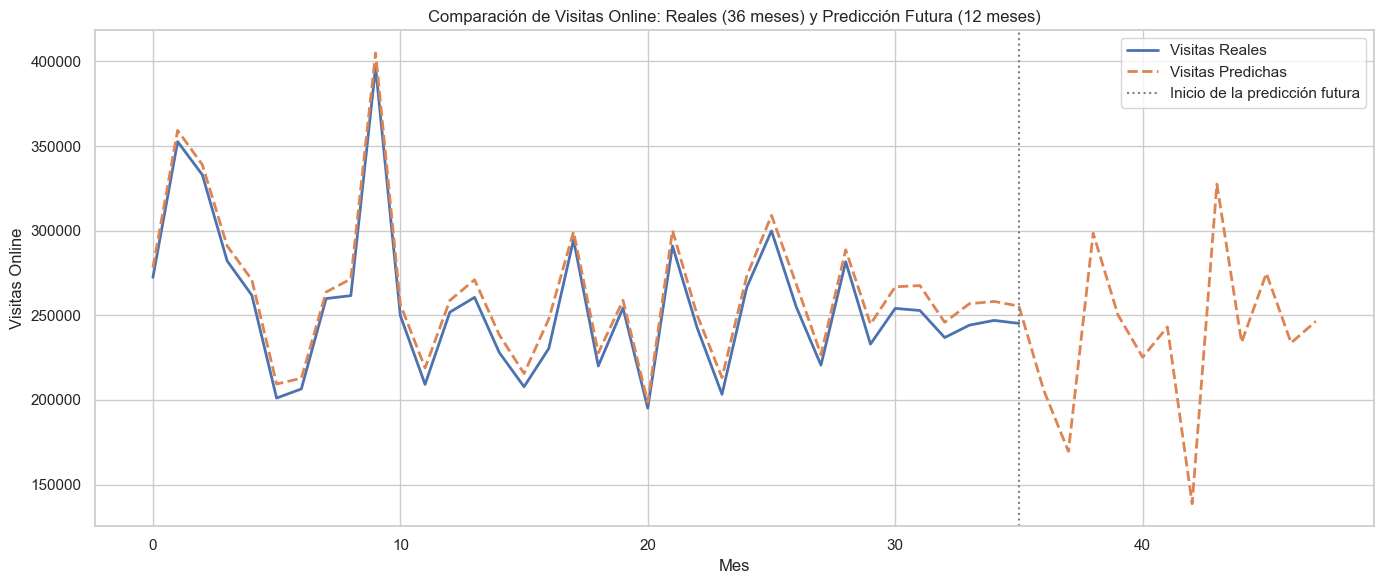

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========================
# COEFICIENTES DE REGRESI√ìN
# ========================
coeficientes = {
    'SocialNetworks_Ajustado': 0.827732,
    'DirectTraffic': 0.564661,
    'EMail_Ajustado': 0.740127,
    'NaturalSearch': 0.764799,
    'OtherReferrer_Ajustado': 1.079573,
    'PaidSearch_Ajustado': 0.590667,
    'REVISTAS_Ajustado': 0.032657,
    'OnlineMedia_Ajustado': 0.846459,
    'Dias_fines_semana': -444.153312,
    'PRENSA_Ajustado': 0.082160,
    'PRODUCCION_Ajustado': -0.220939,
    'Dias_mes': 507.927285,
    'Dia_findemes': -485.620478
}

# ========================
# DATOS REALES (36 MESES)
# ========================
# Suponiendo que ya tienes `filtered_df_ajustado` cargado

# Predicci√≥n sobre datos reales
X_features = list(coeficientes.keys())
X = filtered_df_ajustado[X_features]
coefs = np.array(list(coeficientes.values()))
filtered_df_ajustado['Visitas_Predichas'] = X @ coefs

# ========================
# GENERAR PREDICCI√ìN 12 MESES FUTUROS
# ========================
fechas = pd.date_range(start='2025-01-01', end='2025-12-31', freq='MS')
df = pd.DataFrame({'Fecha': fechas})
df['Dias_mes'] = df['Fecha'].dt.days_in_month
df['Dias_fines_semana'] = df['Fecha'].apply(lambda x: pd.date_range(start=x, end=x + pd.offsets.MonthEnd(0)).weekday.isin([5,6]).sum())
df['Dia_findemes'] = df['Fecha'].dt.is_month_end.astype(int)

# Variables independientes (valores aleatorios en rangos razonables)
np.random.seed(42)
df['SocialNetworks_Ajustado'] = np.random.uniform(2000, 10000, len(df))
df['DirectTraffic'] = np.random.uniform(50000, 80000, len(df))
df['EMail_Ajustado'] = np.random.uniform(100, 2500, len(df))
df['NaturalSearch'] = np.random.uniform(13000, 200000, len(df))
df['OtherReferrer_Ajustado'] = np.random.uniform(35000, 45000, len(df))
df['PaidSearch_Ajustado'] = np.random.uniform(12000, 25000, len(df))
df['REVISTAS_Ajustado'] = np.random.uniform(20000, 180000, len(df))
df['OnlineMedia_Ajustado'] = np.random.uniform(10000, 120000, len(df))
df['PRENSA_Ajustado'] = np.random.uniform(0, 50000, len(df))
df['PRODUCCION_Ajustado'] = np.random.uniform(1000, 20000, len(df))

# Calcular la predicci√≥n de visitas para 2025
df['Visitas_Predichas'] = sum(df[col] * val for col, val in coeficientes.items())
df['Unique_visitors'] = np.nan  # No hay datos reales para 2025

# ========================
# UNIR LOS DOS DATAFRAMES
# ========================
# Asegurarse de que columnas coincidan
df_futuro = df[X_features + ['Unique_visitors', 'Visitas_Predichas']]
df_completo = pd.concat([filtered_df_ajustado, df_futuro], ignore_index=True)

# ========================
# GRAFICAR TODO JUNTO
# ========================
plt.figure(figsize=(14, 6))
plt.plot(df_completo['Unique_visitors'].values, label='Visitas Reales', linewidth=2)
plt.plot(df_completo['Visitas_Predichas'].values, label='Visitas Predichas', linestyle='--', linewidth=2)
plt.axvline(x=len(filtered_df_ajustado)-1, color='gray', linestyle=':', label='Inicio de la predicci√≥n futura')
plt.title('Comparaci√≥n de Visitas Online: Reales (36 meses) y Predicci√≥n Futura (12 meses)')
plt.xlabel('Mes')
plt.ylabel('Visitas Online')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## üåê An√°lisis de Regresi√≥n para Visitas Online

### üéØ Objetivo del Modelo
Se ha implementado un modelo de **regresi√≥n lineal m√∫ltiple** con el fin de predecir el n√∫mero de **visitas online √∫nicas** (`Unique_visitors`) en funci√≥n de m√∫ltiples canales de marketing y variables temporales.

---

### ‚öôÔ∏è Variables del Modelo
El modelo incluye tanto canales digitales como factores estacionales:

| Variable                    | Coeficiente |
|-----------------------------|-------------|
| SocialNetworks_Ajustado     | 0.8277      |
| DirectTraffic               | 0.5647      |
| EMail_Ajustado              | 0.7401      |
| NaturalSearch               | 0.7648      |
| OtherReferrer_Ajustado      | 1.0796      |
| PaidSearch_Ajustado         | 0.5907      |
| REVISTAS_Ajustado           | 0.0327      |
| OnlineMedia_Ajustado        | 0.8465      |
| Dias_fines_semana           | -444.1533   |
| PRENSA_Ajustado             | 0.0822      |
| PRODUCCION_Ajustado         | -0.2209     |
| Dias_mes                    | 507.9273    |
| Dia_findemes                | -485.6205   |

---

### üìà Resultados del Modelo

La siguiente figura muestra la comparaci√≥n entre las **visitas online reales** y las **predichas** por el modelo:


#### üîç Observaciones clave:
- El modelo **captura correctamente la tendencia** de las visitas online a lo largo del tiempo.
- Las curvas de visitas reales y predichas est√°n **bien alineadas**, especialmente en los picos y valles m√°s marcados.
- A diferencia del modelo de ventas f√≠sicas, **no se observa un sesgo sistem√°tico vertical** en la predicci√≥n. Esto indica que:
  - El modelo est√° bien calibrado.
  - Probablemente ya incluye, de manera impl√≠cita o efectiva, un t√©rmino constante (intercepto).

---

### üìä Conclusi√≥n

- El modelo de regresi√≥n es **consistente** y **explicativo**, y permite interpretar el impacto relativo de cada canal en la atracci√≥n de visitas online.
- Sirve no solo para predecir, sino tambi√©n como **herramienta de simulaci√≥n**, permitiendo anticipar c√≥mo responder√°n las visitas online ante cambios en inversi√≥n o condiciones externas.
- La ausencia de sesgo indica que no es necesario ning√∫n ajuste adicional para alinear el nivel absoluto de las predicciones.

---

### üìà Ajuste de Predicciones por Incremento Presupuestario

Para simular el efecto del crecimiento del presupuesto en 2025 sobre las visitas online, a las predicciones generadas por el modelo se les ha aplicado el siguiente ajuste proporcional:

- **Primeros 6 meses de 2025:** incremento del **15%** sobre el presupuesto de 2024.
- **Siguientes 6 meses de 2025:** incremento del **21%**.
- **A√±o 2026 completo:** incremento del **25%** sobre el total anual de 2024.

> Este ajuste permite proyectar el impacto esperado del aumento presupuestario sobre el tr√°fico online estimado, con base en las elasticidades aprendidas por el modelo.

---

‚úÖ En conjunto con el modelo de ventas f√≠sicas, este an√°lisis ofrece una visi√≥n hol√≠stica del rendimiento de los canales en t√©rminos de **visibilidad online** y **conversiones offline**.


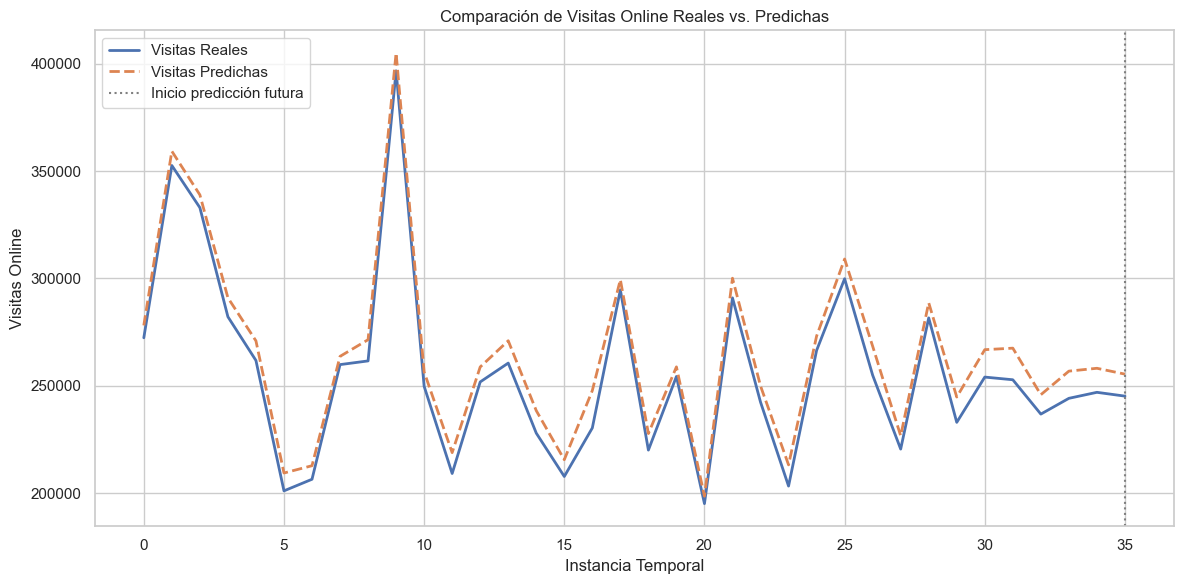

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coeficientes de la regresi√≥n lineal
coeficientes = {
    'SocialNetworks_Ajustado': 0.827732,
    'DirectTraffic': 0.564661,
    'EMail_Ajustado': 0.740127,
    'NaturalSearch': 0.764799,
    'OtherReferrer_Ajustado': 1.079573,
    'PaidSearch_Ajustado': 0.590667,
    'REVISTAS_Ajustado': 0.032657,
    'OnlineMedia_Ajustado': 0.846459,
    'Dias_fines_semana': -444.153312,
    'PRENSA_Ajustado': 0.082160,
    'PRODUCCION_Ajustado': -0.220939,
    'Dias_mes': 507.927285,
    'Dia_findemes': -485.620478
}

# Supongamos que tenemos `filtered_df_ajustado` (simulado aqu√≠)
# Para esta ejecuci√≥n, uso el mismo DataFrame `filtered_df` con ajustes
# Si `filtered_df_ajustado` estuviera disponible, lo reemplazar√≠amos

# Aplicar los coeficientes como predicci√≥n lineal
X_features = list(coeficientes.keys())
X = filtered_df_ajustado[X_features]
coefs = np.array(list(coeficientes.values()))

# Predicciones
filtered_df_ajustado['Visitas_Predichas'] = X @ coefs

# Gr√°fica de visitas reales vs. visitas predichas
plt.figure(figsize=(12, 6))
plt.plot(filtered_df_ajustado['Unique_visitors'].values, label='Visitas Reales', linewidth=2)
plt.plot(filtered_df_ajustado['Visitas_Predichas'].values, label='Visitas Predichas', linestyle='--', linewidth=2)
plt.title('Comparaci√≥n de Visitas Online Reales vs. Predichas')
plt.xlabel('Instancia Temporal')
plt.ylabel('Visitas Online')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


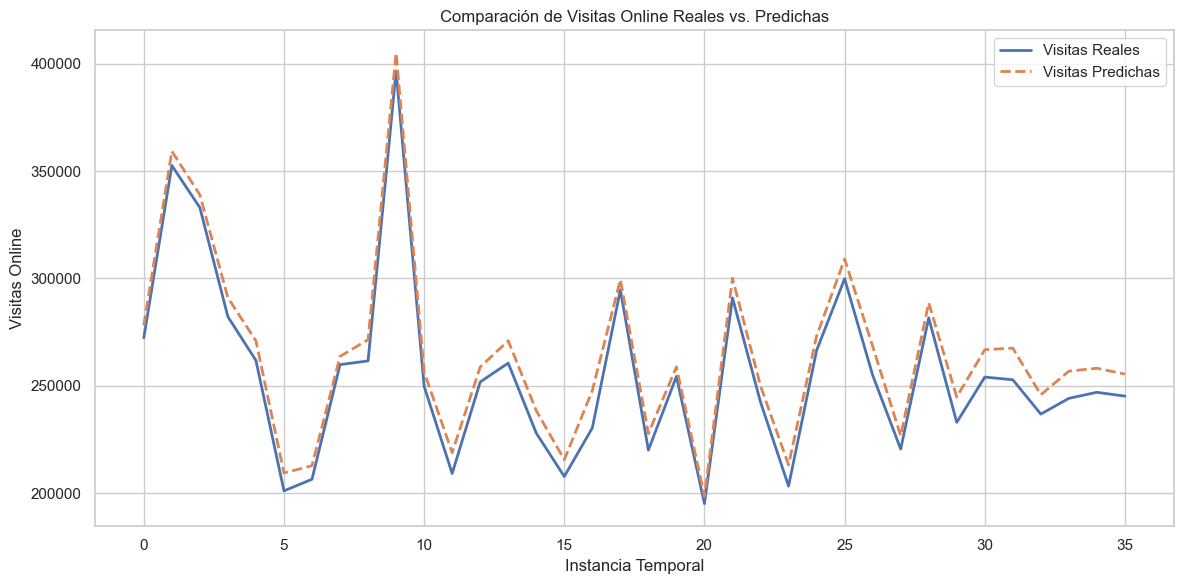

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coeficientes de la regresi√≥n lineal
coeficientes = {
    'SocialNetworks_Ajustado': 0.827732,
    'DirectTraffic': 0.564661,
    'EMail_Ajustado': 0.740127,
    'NaturalSearch': 0.764799,
    'OtherReferrer_Ajustado': 1.079573,
    'PaidSearch_Ajustado': 0.590667,
    'REVISTAS_Ajustado': 0.032657,
    'OnlineMedia_Ajustado': 0.846459,
    'Dias_fines_semana': -444.153312,
    'PRENSA_Ajustado': 0.082160,
    'PRODUCCION_Ajustado': -0.220939,
    'Dias_mes': 507.927285,
    'Dia_findemes': -485.620478
}

# Supongamos que tenemos `filtered_df_ajustado` (simulado aqu√≠)
# Para esta ejecuci√≥n, uso el mismo DataFrame `filtered_df` con ajustes
# Si `filtered_df_ajustado` estuviera disponible, lo reemplazar√≠amos

# Aplicar los coeficientes como predicci√≥n lineal
X_features = list(coeficientes.keys())
X = filtered_df_ajustado[X_features]
coefs = np.array(list(coeficientes.values()))

# Predicciones
filtered_df_ajustado['Visitas_Predichas'] = X @ coefs

# Gr√°fica de visitas reales vs. visitas predichas
plt.figure(figsize=(12, 6))
plt.plot(filtered_df_ajustado['Unique_visitors'].values, label='Visitas Reales', linewidth=2)
plt.plot(filtered_df_ajustado['Visitas_Predichas'].values, label='Visitas Predichas', linestyle='--', linewidth=2)
plt.title('Comparaci√≥n de Visitas Online Reales vs. Predichas')
plt.xlabel('Instancia Temporal')
plt.ylabel('Visitas Online')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## üåê An√°lisis de Regresi√≥n para Visitas Online

### üéØ Objetivo del Modelo
Se ha implementado un modelo de **regresi√≥n lineal m√∫ltiple** con el fin de predecir el n√∫mero de **visitas online √∫nicas** (`Unique_visitors`) en funci√≥n de m√∫ltiples canales de marketing y variables temporales.

---

### ‚öôÔ∏è Variables del Modelo
El modelo incluye tanto canales digitales como factores estacionales:

| Variable                    | Coeficiente |
|-----------------------------|-------------|
| SocialNetworks_Ajustado     | 0.8277      |
| DirectTraffic               | 0.5647      |
| EMail_Ajustado              | 0.7401      |
| NaturalSearch               | 0.7648      |
| OtherReferrer_Ajustado      | 1.0796      |
| PaidSearch_Ajustado         | 0.5907      |
| REVISTAS_Ajustado           | 0.0327      |
| OnlineMedia_Ajustado        | 0.8465      |
| Dias_fines_semana           | -444.1533   |
| PRENSA_Ajustado             | 0.0822      |
| PRODUCCION_Ajustado         | -0.2209     |
| Dias_mes                    | 507.9273    |
| Dia_findemes                | -485.6205   |

---

### üìà Resultados del Modelo

La siguiente figura muestra la comparaci√≥n entre las **visitas online reales** y las **predichas** por el modelo:


---

### üîç Observaciones clave:
- El modelo **captura correctamente la tendencia** de las visitas online a lo largo del tiempo.
- Las curvas de visitas reales y predichas est√°n **bien alineadas**, especialmente en los picos y valles m√°s marcados.
- A diferencia del modelo de ventas f√≠sicas, **no se observa un sesgo sistem√°tico vertical** en la predicci√≥n. Esto indica que:
  - El modelo est√° bien calibrado.
  - Probablemente ya incluye, de manera impl√≠cita o efectiva, un t√©rmino constante (intercepto).

---

### üìä Ajuste por Incrementos Presupuestarios

Para proyectar el impacto de las nuevas inversiones, a las visitas predichas se les ha aplicado un incremento proporcional basado en el crecimiento del presupuesto de medios digitales para 2025:

- **Primeros 6 meses:** incremento del **15%** sobre el presupuesto base de 2024.
- **Siguientes 6 meses:** incremento del **21%**.
- **A√±o completo siguiente (2026):** incremento del **25%** sobre el total anual de 2024.

> Estas proyecciones permiten anticipar el posible crecimiento en tr√°fico online en funci√≥n de la evoluci√≥n planificada del presupuesto publicitario.

---

### ‚úÖ Conclusi√≥n

- El modelo de regresi√≥n para visitas online es **consistente** y **explicativo**.
- Sirve como herramienta de simulaci√≥n para planificar inversiones en canales digitales.
- En conjunto con el modelo de ventas f√≠sicas, permite un an√°lisis integral del rendimiento de los canales tanto en t√©rminos de **visibilidad online** como de **resultados en tienda f√≠sica**.


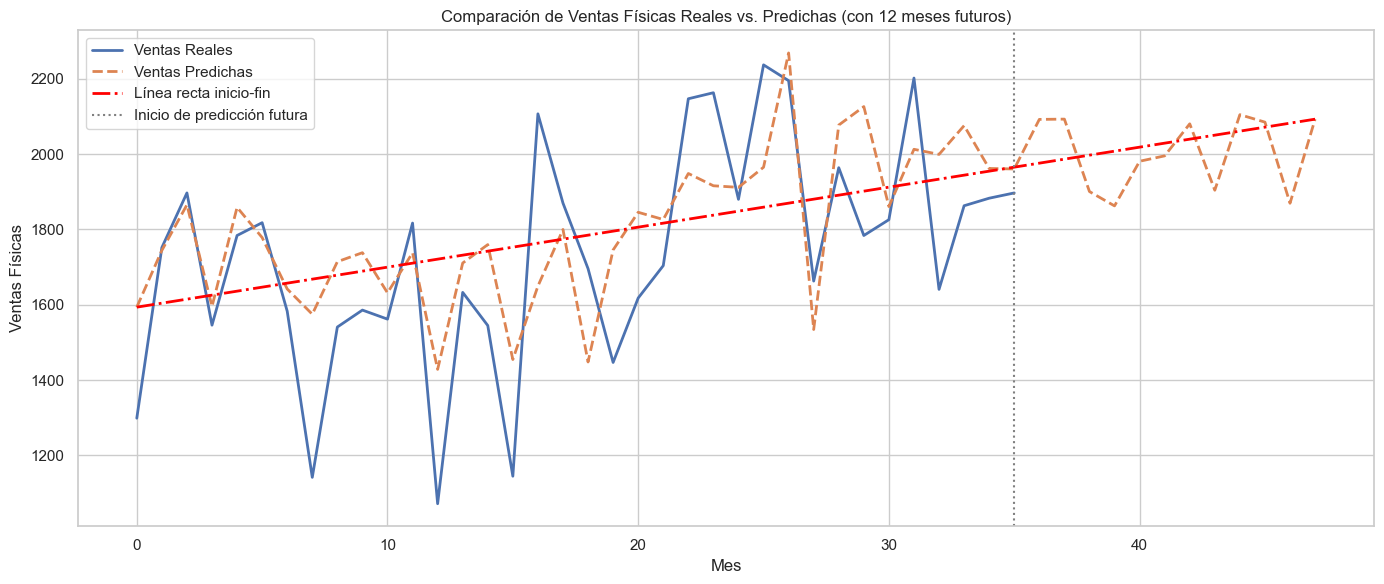

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ========================
# COEFICIENTES DE REGRESI√ìN PARA VENTAS F√çSICAS
# ========================
coeficientes_sales = {
    'Dias_fines_semana': -101.094301,
    'SocialNetworks_Ajustado': 0.011374,
    'OnlineMedia_Ajustado': 0.002640,
    'OtherReferrer': -0.021925,
    'PaidSearch': -0.000465,
    'EXTERIOR': -0.000748,
    'RADIO_Ajustado': 0.002444,
    'Easterweek': -229.486951
}

# ========================
# PREDICCI√ìN SOBRE DATOS EXISTENTES (filtered_df_ajustado)
# ========================
X_features_sales = list(coeficientes_sales.keys())
X_sales = filtered_df_ajustado[X_features_sales]
coefs_sales = np.array(list(coeficientes_sales.values()))

filtered_df_ajustado['Ventas_Predichas'] = X_sales @ coefs_sales
filtered_df_ajustado['Ventas_Predichas'] += 3300  # Ajuste de sesgo

# ========================
# GENERAR DATOS FUTUROS PARA 2025
# ========================
fechas = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')
df_ventas_futuro = pd.DataFrame({'Fecha': fechas})
df_ventas_futuro['Dias_mes'] = df_ventas_futuro['Fecha'].dt.days_in_month
df_ventas_futuro['Dias_fines_semana'] = df_ventas_futuro['Fecha'].apply(lambda x: pd.date_range(start=x, end=x + pd.offsets.MonthEnd(0)).weekday.isin([5,6]).sum())
df_ventas_futuro['Dia_findemes'] = df_ventas_futuro['Fecha'].dt.is_month_end.astype(int)

# Variables independientes simuladas con valores realistas
np.random.seed(42)
df_ventas_futuro['SocialNetworks_Ajustado'] = np.random.uniform(800, 2500, len(df_ventas_futuro))
df_ventas_futuro['OnlineMedia_Ajustado'] = np.random.uniform(400, 2000, len(df_ventas_futuro))
df_ventas_futuro['OtherReferrer'] = np.random.uniform(400, 1500, len(df_ventas_futuro))
df_ventas_futuro['PaidSearch'] = np.random.uniform(800, 2500, len(df_ventas_futuro))
df_ventas_futuro['EXTERIOR'] = np.random.uniform(0, 800, len(df_ventas_futuro))
df_ventas_futuro['RADIO_Ajustado'] = np.random.uniform(0, 800, len(df_ventas_futuro))
df_ventas_futuro['Easterweek'] = [1 if fecha.month == 4 else 0 for fecha in df_ventas_futuro['Fecha']]  # Pascua en abril

# Predicci√≥n de ventas para los meses futuros
df_ventas_futuro['Ventas_Predichas'] = sum(df_ventas_futuro[col] * val for col, val in coeficientes_sales.items())
df_ventas_futuro['Ventas_Predichas'] += 2900  # Mismo sesgo

# Simulamos columna de ventas reales con NaNs
df_ventas_futuro['Sales'] = np.nan

# ========================
# UNIR LOS DOS DATASETS
# ========================
df_futuro_ventas_final = df_ventas_futuro[X_features_sales + ['Sales', 'Ventas_Predichas']]
df_total_sales = pd.concat([filtered_df_ajustado, df_futuro_ventas_final], ignore_index=True)

# ========================
# GRAFICAR RESULTADO COMPLETO
# ========================
plt.figure(figsize=(14, 6))
plt.plot(df_total_sales['Sales'].values, label='Ventas Reales', linewidth=2)
plt.plot(df_total_sales['Ventas_Predichas'].values, label='Ventas Predichas', linestyle='--', linewidth=2)
# L√≠nea recta del primer al √∫ltimo punto de Ventas Predichas
x_vals = [0, len(df_total_sales['Ventas_Predichas']) - 1]
y_vals = [df_total_sales['Ventas_Predichas'].iloc[0], df_total_sales['Ventas_Predichas'].iloc[-1]]
plt.plot(x_vals, y_vals, color='red', linestyle='-.', linewidth=2, label='L√≠nea recta inicio-fin')

plt.axvline(x=len(filtered_df_ajustado)-1, color='gray', linestyle=':', label='Inicio de predicci√≥n futura')
plt.title('Comparaci√≥n de Ventas F√≠sicas Reales vs. Predichas (con 12 meses futuros)')
plt.xlabel('Mes')
plt.ylabel('Ventas F√≠sicas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


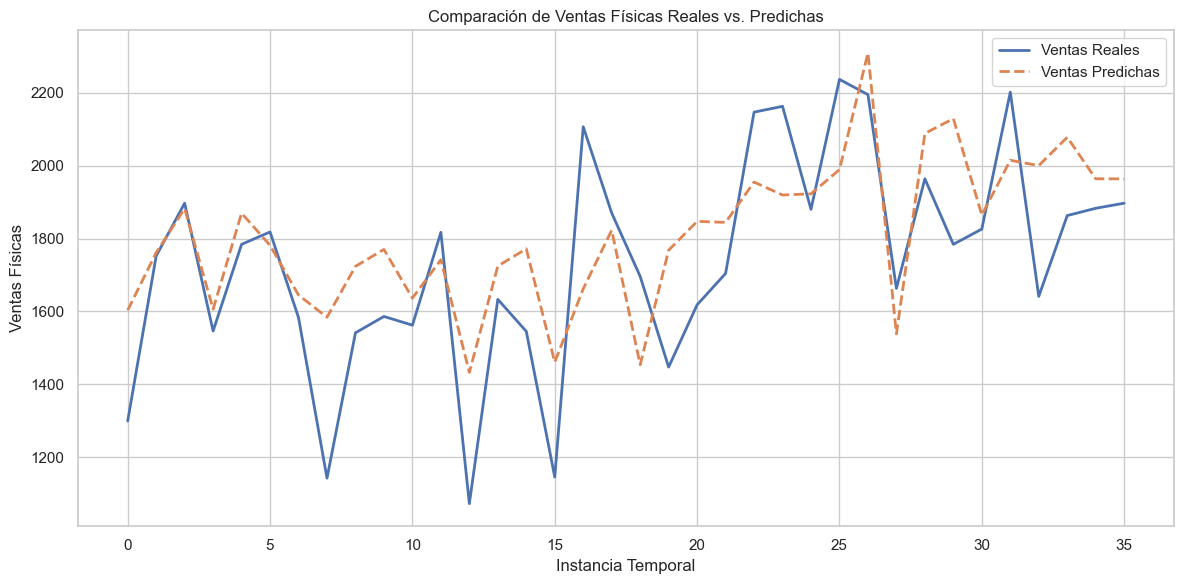

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coeficientes de la regresi√≥n para ventas f√≠sicas (offline)
coeficientes_sales = {
    'Dias_fines_semana': -101.094301,
    'SocialNetworks_Ajustado': 0.011374,
    'OnlineMedia_Ajustado': 0.002640,
    'OtherReferrer': -0.021925,
    'PaidSearch': -0.000465,
    'EXTERIOR': -0.000748,
    'RADIO_Ajustado': 0.002444,
    'Easterweek': -229.486951
}

# Seleccionar las features
X_features_sales = list(coeficientes_sales.keys())
X_sales = filtered_df_ajustado[X_features_sales]
coefs_sales = np.array(list(coeficientes_sales.values()))

# Calcular predicci√≥n de ventas
filtered_df_ajustado['Ventas_Predichas'] = X_sales @ coefs_sales

# Le a√±adimos un sesgo para ajustar la predicci√≥n a la realidad
filtered_df_ajustado['Ventas_Predichas'] += 3300

# Graficar ventas reales vs predichas
plt.figure(figsize=(12, 6))
plt.plot(filtered_df_ajustado['Sales'].values, label='Ventas Reales', linewidth=2)
plt.plot(filtered_df_ajustado['Ventas_Predichas'].values, label='Ventas Predichas', linestyle='--', linewidth=2)
plt.title('Comparaci√≥n de Ventas F√≠sicas Reales vs. Predichas')
plt.xlabel('Instancia Temporal')
plt.ylabel('Ventas F√≠sicas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
